# Data Visualization with ggplot2 (Part 2)

Link: https://learn.datacamp.com/courses/data-visualization-with-ggplot2-2

Old Version: https://learn.datacamp.com/courses/intermediate-data-visualization-with-ggplot2

Pendient : 3.1.1) Rectangles

### Course Description
This ggplot2 tutorial builds on your knowledge from the first course to produce meaningful explanatory plots. We'll explore the last four optional layers. Statistics will be calculated on the fly and we’ll see how Coordinates and Facets aid in communication. Publication quality plots will be produced directly in R using the Themes layer. We’ll also discuss details on data visualization best practices with ggplot2 to help make sure you have a sound understanding of what works and why. By the end of the course, you’ll have all the tools needed to make a custom plotting function to explore a large data set, combining statistics and excellent visuals.

We will see axamine the last four layers: statistics, coordinates, facets, and themes in detail

### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 
https://www.tablesgenerator.com/markdown_tables

### Explication of geom
http://sape.inf.usi.ch/quick-reference/ggplot2/geom (type of geom in R)

https://www.datanalytics.com/libro_r/elementos-de-un-grafico-en-ggplot2.html
other: http://docs.ggplot2.org/current/



In [1]:
library(MASS)
#head(mammals)
library(ggplot2)
library(tidyverse)
#head(mtcars)
library(gridExtra)
library(repr)
#mtcars$fcyl <- as.factor(mtcars$cyl)

library(ggplot2)

library(datasets)
data("iris")
library(car)
data(Vocab)
library(RColorBrewer)

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'tidyverse' was built under R version 3.5.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.3     v purrr   0.2.5
v tidyr   0.8.2     v dplyr   0.8.3
v readr   1.3.1     v stringr 1.4.0
v tibble  2.1.3     v forcats 0.3.0
Warning message:
"package 'tibble' was built under R version 3.5.3"Warning message:
"package 'readr' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"Warning message:
"package 'stringr' was built under R version 3.5.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()
Warning message:
"package 'gridExtra' was built under R version 3.5.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

War

## 1) Statistics 
In this chapter, we’ll delve into how to use R ggplot2 as a tool for graphical data analysis, progressing from just plotting data to applying a variety of statistical methods. This includes a variety of linear models, descriptive and inferential statistics (mean, standard deviation and confidence intervals) and custom functions.

### 1.1) Stats and Geom 
We'll examine the last four layers:

- statistics
- coordinates
- faces
- themes 

So, let's start with `statistics`, there are two broad (wide) cetegories of functions in this category:

1. that are called within a `geom`
2. and those are called independently 

All statistics functions begin with `stats` underscore, actually, we´ve encountered `stats` funtions when we used geom histrogram because remember under the hood, this function called `stat bin` to summarize the total count in each group, you may also remember that when we discussed `geom_bar` we mentioned that it's defaut stat is set to bin, so we could have produce the same resut if we use `geom_bar` or we could just called `stat_bin` directely

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


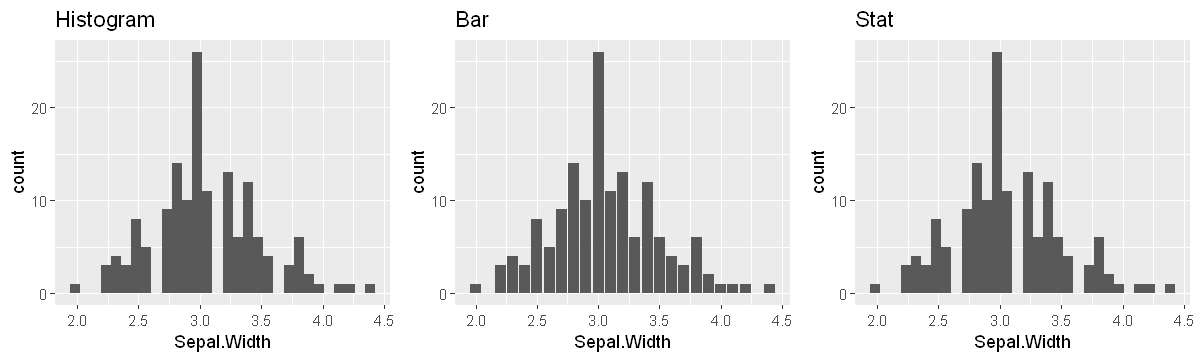

In [5]:
p <- ggplot(iris, aes(x= Sepal.Width))
a1<- p + geom_histogram() + ggtitle("Histogram")
a2<- p + geom_bar() + ggtitle("Bar")
a3<- p + stat_bin() + ggtitle("Stat")

options(repr.plot.width=10, repr.plot.height=3)
grid.arrange(a1, a2,a3, nrow = 1)


Note: `stat_bin` simply counts the number of observation for each group, it´s the default stat for the histrogram, bar, and frequency polygon geoms that we saw earlier.

| stat_       | geom_            |
|-------------|------------------|
| stat _bin() | geom_histogram() |
| stat _bin() | geom_bar()       |
| stat _bin() | geom_freqpoly()  |

Now you can appreciate what the warning message is telling us "stat bin: binwidth defaulted to range-over-30 " is referring to a stats layer and its associated argument that was called in the background when we using a function like geom_histogram(), other functions that are called by default: 

| stat_         | geom_         |
|---------------|---------------|
| stat_smooth() | geom_smooth() |

and other stat_ functions:

| stat_           | geom_            |
|-----------------|------------------|
| stat_boxplot()  | geom_boxplot()   |
| stat_bindot()   | geom_dotplot()   |
| stat_bin2d()    | geom_bin2d()     |
| stat_binhex()   | geom_hex()       |
| stat_contour()  | geom_contour()   |
| stat_quantile() | geom_quantile()  |
| stat_sum()      | geom_count()     |

you wont call this function directly but it´s important that you know about the relationship between genes and their respective statistics.

#### 1.1.1) Smoothing
In the previous course we learned how to effectively use some basic geometries, such as point, bar and line. In the first chapter of this course we'll explore statistics associated with specific geoms, for example, smoothing and lines, we´ll continue working with `mtcars` dataset

**Exercise**

- Familiarize yourself again with the mtcars dataset using str().
- Extend the first ggplot call: add a **LOESS** smooth to the scatter plot (which is the default) with geom_smooth(). We want  to have the actual values and the smooth on the same plot.
- Change the previous plot to use an ordinary linear model, by default it will be y ~ x, so you don't have to specify a formula. You should set the method argument to "lm".
- Modify the previous plot to remove the 95% CI ribbon. You should set the se argument to FALSE.
- Modify the previous plot to show only the model, and not the underlying dots.

*answer*

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


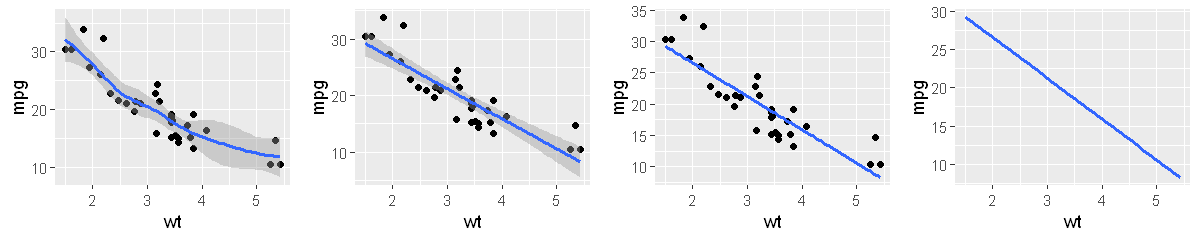

In [9]:

# A scatter plot with LOESS smooth
a1<-ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()+ geom_smooth()


# A scatter plot with an ordinary Least Squares linear model
a2<-ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()+ geom_smooth(method = "lm")


# The previous plot, without CI ribbon
a3<-ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()+ geom_smooth(method = "lm", se = FALSE)


# The previous plot, without points
a4<-ggplot(mtcars, aes(x = wt, y = mpg)) + geom_smooth(method = "lm", se = FALSE)

options(repr.plot.width=10, repr.plot.height=2)
grid.arrange(a1, a2,a3,a4, nrow = 1)

#### 1.1.2) Grouping variables
We'll continue with the previous exercise by considering the situation of looking at sub-groups in our dataset. For this we'll encounter the invisible group aesthetic.

**Exercise** 

A plot that maps `cyl` onto the `col` aesthetic is already coded.

- Change `col` so that `factor(cyl)` is mapped onto it instead of just `cyl`.
    - Note: In this ggplot command our smooth is calculated for each subgroup because there is an invisible aesthetic, group which inherits from `col`.
- Complete the second ggplot command.
    - Add another `stat_smooth()` layer with exactly the same attributes (method set to "lm", se to FALSE).
    - Add a `group` aesthetic inside the `aes()` of this new `stat_smooth()`, set it to a dummy variable, `1`.

*answer*

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


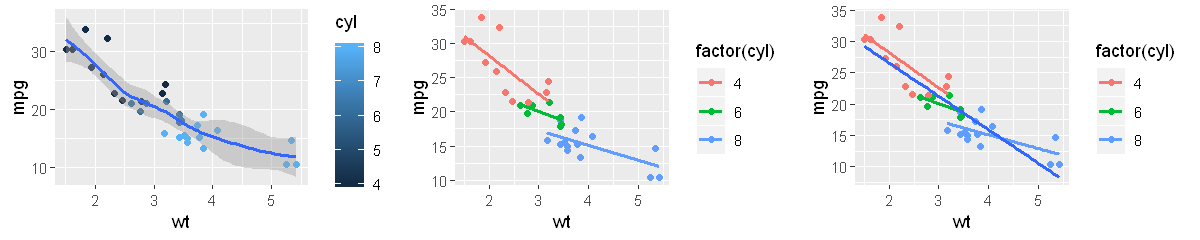

In [11]:
# A scatter plot with LOESS smooth
a1<-ggplot(mtcars, aes(x = wt, y = mpg, col = cyl)) +
  geom_point()+ geom_smooth()

# 1 - Define cyl as a factor variable
a2<-ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

# 2 - Plot 1, plus another stat_smooth() containing a nested aes()
a3<-ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE) +
  stat_smooth(method = "lm", se = FALSE, aes(group = 1))


options(repr.plot.width=10, repr.plot.height=2)
grid.arrange(a1, a2,a3, nrow = 1)

Notice that we can use multiple aesthetic layers, just like we can use multiple geom layers. Each aesthetic layer can be mapped onto a specific geom

#### 1.1.3) Modifying stat_smooth
In the previous exercise we used `se = FALSE` in `stat_smooth()` to remove the 95% Confidence Interval. Here we'll consider another argument, `span`, used in `LOESS smoothing`, and we'll take a look at a nice scenario of properly mapping different models.

**Exercise**

- Plot 1: Recall that LOESS smoothing is a non-parametric form of regression that uses a weighted, sliding-window, average to calculate a line of best fit. We can control the size of this window with the `span` argument.

    - Add `span`, set it to `0.7.`
    
    
- Plot 2: In this plot, we set a linear model for the entire dataset as well as each subgroup, defined by `cyl`. In the second `stat_smooth()`,

    - Set method to "loess" (this is the default with a small (n < 1000) data set, but we will specify it explicitly).
Add `span`, set it to `0.7`.



- Plot 3: Plot 2 presents a problem because there is a black line on our plot that is not included in the legend. To get this, we need to `map` something to `col` as an aesthetic, not just set `col` as an attribute.

    - Add `col` to the `aes()` function in the second stat_smooth(), set it to "All". This will name the line properly.
Remove the col attribute in the second stat_smooth(). Otherwise, it will overwrite the col aesthetic.



- Plot 4: Now we should see our "All" model in the legend, but it's not black anymore.

    - Add a scale layer: `scale_color_manual()` with the first argument set to `"Cylinders"` and values set to the predefined `myColors` variable.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


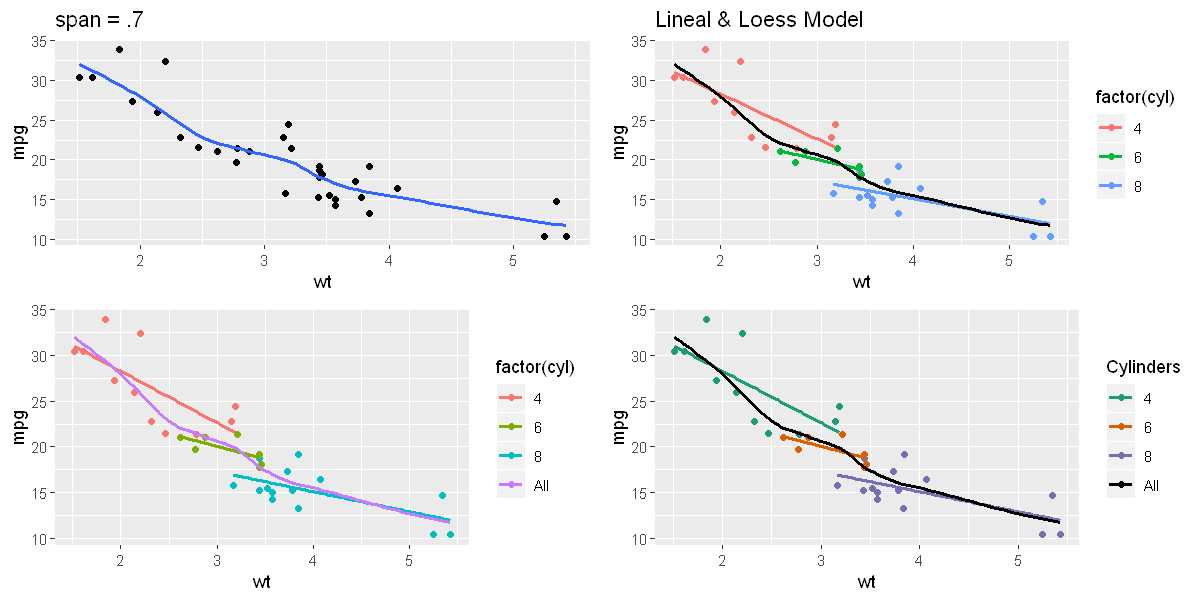

In [26]:
# Plot 1: change the LOESS span
a1<-ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  # Add span below
  geom_smooth(se = FALSE, span= 0.7) + ggtitle('span = .7')

# Plot 2: Set the second stat_smooth() to use LOESS with a span of 0.7
a2<-ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE) +
  # Change method and add span below
  stat_smooth(method = "loess", aes(group = 1),
              se = FALSE, col = "black", span = 0.7) + ggtitle('Lineal & Loess Model' )


# Plot 3: Set col to "All", inside the aes layer of stat_smooth()
a3<-ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE) +
  stat_smooth(method = "loess",
              # Add col inside aes()
              aes(group = 1, col = "All"),
              # Remove the col argument below
              se = FALSE, span = 0.7)

# Plot 4: Add scale_color_manual to change the colors
myColors <- c(brewer.pal(3, "Dark2"), "black")
a4<-ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE, span = 0.7) +
  stat_smooth(method = "loess", 
              aes(group = 1, col="All"), 
              se = FALSE, span = 0.7) +
  # Add correct arguments to scale_color_manual
  scale_color_manual("Cylinders", values = myColors)


options(repr.plot.width=10, repr.plot.height=5)
grid.arrange(a1,a2,a3,a4, nrow = 2)

Note:  The default span for LOESS is 0.9. A lower span will result in a better fit with more detail; but don't overdo it or you'll end up over-fitting!

#### 1.1.4) Modifying stat_smooth (2)
In this exercise we'll take a look at a more subtle example of defining and using linear models. `ggplot2` and the `Vocab` data frame are already loaded for you.

**Exercise**
- Plot 1: This code produces a `jittered` plot of `vocabulary` against `education`, variables from the Vocab data frame.
    - Add a stat_smooth() layer with method set to "lm". Hide the CI ribbons by using se = FALSE.


- Plot 2: `Color` by `year`.
    - Specify the `col = year` aesthetic to the nested ggplot(aes()) function.
    - To see why this works, try using only  `col = year`, and adding points.


- Plot 3: Linear model for each year.
    - We need to specify `year` as a factor variable if we want to use it as a grouping variable for our linear models. Add the `col = factor(year)` aesthetic to the nested ggplot(aes()) function.
    

- Plot 4: Years are ordered, so use a sequential color palette.
    - Add `scale_color_brewer()`.
    - Don't add any arguments here. This results in a warning message, since the default palette, "Blues", only has 9 colors. Since we have 16 years, this is not a complete solution!


- Plot 5: To get the proper colors, we can use `col = year`, because the variable year is type integer and we want a continuous scale. However, we'll need to specify the invisible group aesthetic so that our linear models are still calculated appropriately. The scale layer, `scale_color_gradientn()`, has been provided for you - this allows us to map a continuous variable onto a colour scale.
    - Add group = factor(year) inside aes().
    - Inside stat_smooth(), set alpha = 0.6 and size = 2.

*Answer*

Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
"

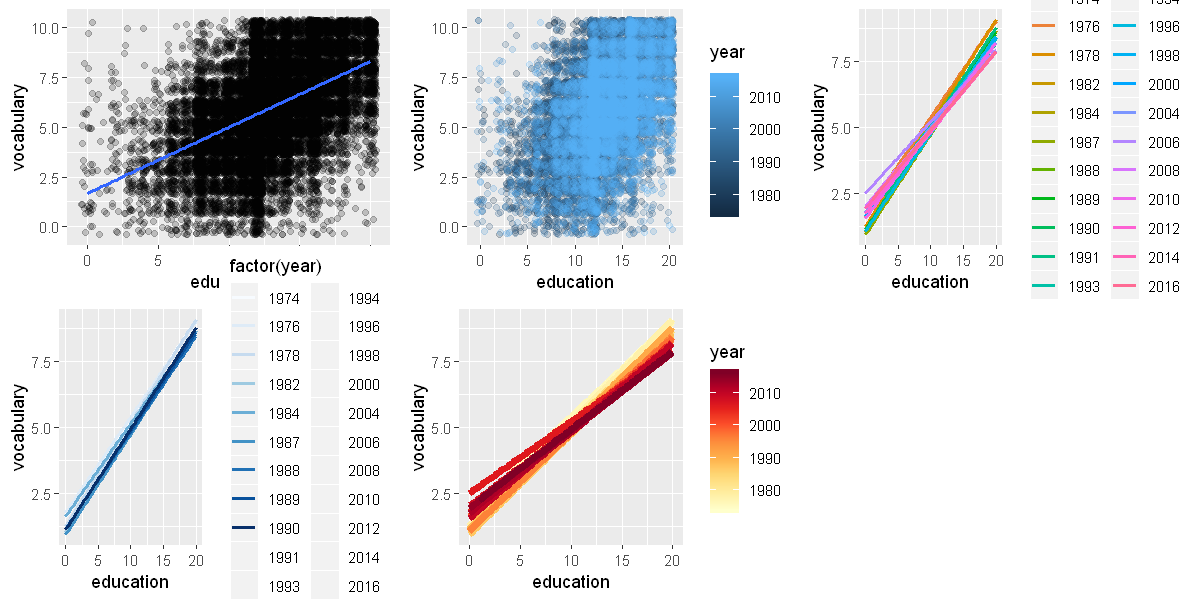

In [31]:
#str(Vocab)

# Plot 1: Jittered scatter plot, add a linear model (lm) smooth
a1<-ggplot(Vocab, aes(x = education, y = vocabulary)) +
  geom_jitter(alpha = 0.2) +
  stat_smooth(method = "lm", se = FALSE) # smooth

# Plot 2: points, colored by year
a2<-ggplot(Vocab, aes(x = education, y = vocabulary, col = year)) +
  geom_jitter(alpha = 0.2) 


# Plot 3: lm, colored by year
a3<-ggplot(Vocab, aes(x = education, y = vocabulary, col = factor(year))) +
  stat_smooth(method= "lm", se = FALSE) # smooth
  
# Plot 4: Set a color brewer palette
a4<-ggplot(Vocab, aes(x = education, y = vocabulary, col = factor(year))) +
  stat_smooth(method= "lm", se = FALSE) +  # smooth
  scale_color_brewer()  # colors

# Plot 5: Add the group aes, specify alpha and size
a5<-ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group = factor(year))) +
  stat_smooth(method = "lm", se = FALSE, alpha = .6, size = 2) +
  scale_color_gradientn(colors = brewer.pal(9, "YlOrRd"))


options(repr.plot.width=10, repr.plot.height=5)
grid.arrange(a1,a2,a3,a4,a5, nrow = 2)

#### 1.1.5) Quantiles
The previous example used the `Vocab` dataset and applied linear models describing `vocabulary` by `education` for different `years`. Here we'll continue with that example by using `stat_quantile(`) to apply a quantile regression (method `rq`).

By default, the 1st, 2nd (i.e. median), and 3rd quartiles are modeled as a response to the predictor variable, in this case education. Specific quantiles can be specified with the quantiles argument.

**Exercise**

The code from the previous exercise, with the linear model and a suitable color palette, is already shown.

- Update the plotting code.
    - Change the stat function from `stat_smooth()` to `stat_quantile()`.
    - Get rid of all the arguments except `alpha` and `size`.


- The resulting plot will be a mess, because there are three quartiles drawn by default.
    - Copy the code for the previous instruction.
    - Set the `quantile`s argument to `0.5` so that only the median is shown.
    
*anwser*   

Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"Smoothing formula not specified. Using: y ~ x
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"Smoothing formula not specified. Using: y ~ x
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"Warning message in rq.fit.br(wx, wy, tau = 

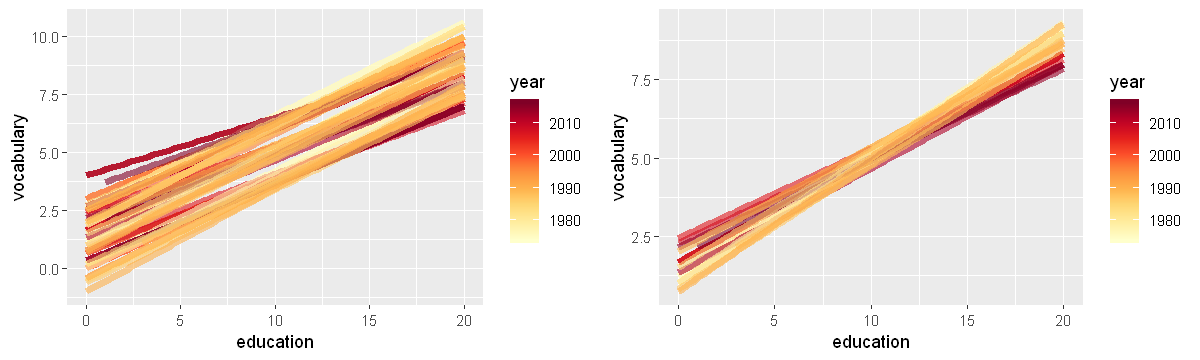

In [3]:
# Use stat_quantile instead of stat_smooth

# Set quantile to 0.5
a1<-ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group = factor(year))) +
  stat_quantile(alpha = 0.6, size = 2) +
  scale_color_gradientn(colors = brewer.pal(9,"YlOrRd"))


a2<-ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group = factor(year))) +
  stat_quantile(alpha = 0.6, size = 2, quantiles = .5) +
  scale_color_gradientn(colors = brewer.pal(9,"YlOrRd"))


options(repr.plot.width=10, repr.plot.height=3)
grid.arrange(a1, a2, nrow = 1)

#### 1.1.5) Sum
Another useful stat function is `stat_sum()`. This function calculates the total number of overlapping observations and is another good alternative to overplotting.

**Exercise**

ggplot2 is already loaded. A plot showing jittered points is already provided and stored as `p`.

- Add `stat_sum()` to this plotting object `p`. This maps the overall count of each dot onto size. You don't have to set any arguments; the aesthetics will be inherited from the base plot!
- Add the size scale with the generic `scale_size()` function. Use `range` to set the minimum and maximum dot sizes as c(1,10).

*answer*

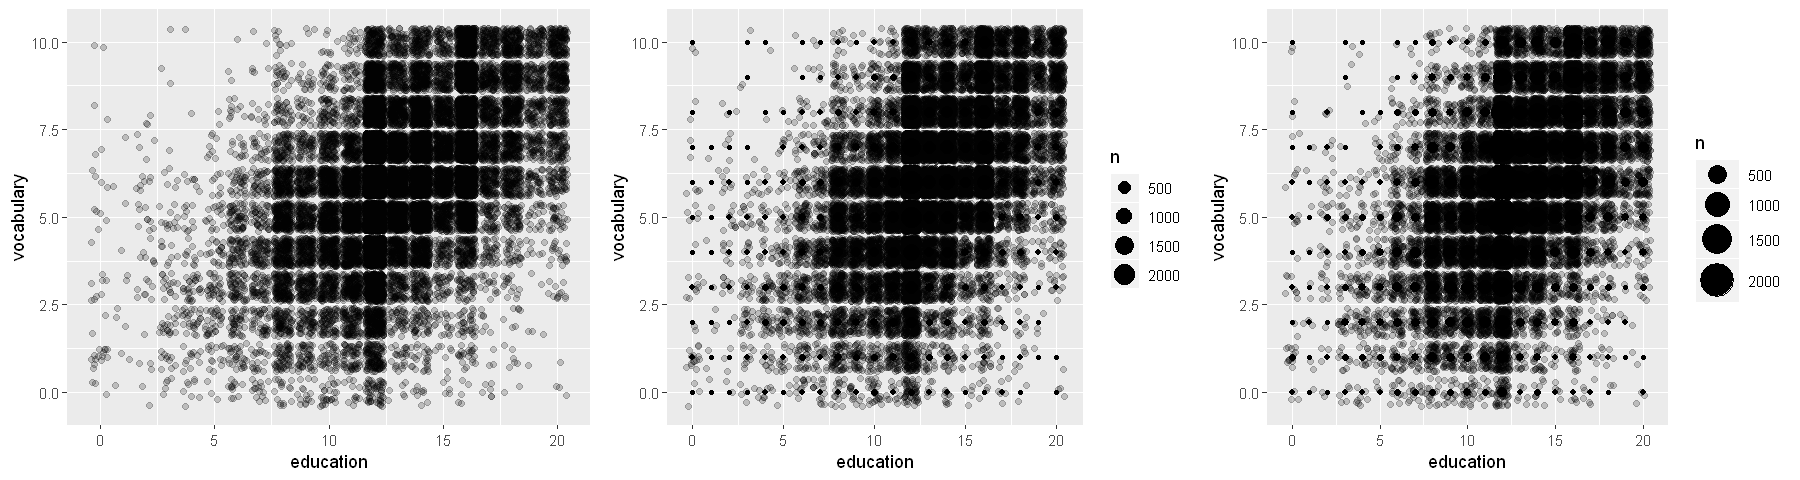

In [6]:
# Plot 1: Jittering only
p <- ggplot(Vocab, aes(x = education, y = vocabulary)) +
  geom_jitter(alpha = 0.2)

# Plot 2: Add stat_sum
a2<-p + stat_sum() 

# Plot 3: Set size range
a3<-p + stat_sum() + scale_size(range = c(1,10))

options(repr.plot.width=15, repr.plot.height=4)
grid.arrange(p, a2,a3, nrow = 1)


### 1.2) (video) Stats outside Geoms
now we are going to see a variety of `statistics` that can be called directly, to explain this we need to remember our first examples (a1) , so ,what we can do?  a typical wat to summarize this data would be to take the mean and sd or 95 % conficente interval, to calculate this values we can use base package functions and make a new dataframe,but a more convenient way is to call some functions in the `Hmisc` package directly in ggplot.

    library(Hmisc)
    smean.sdl(data, mult = 1) 

to use this information in ggplo2, there is a special function, which simply converts this vector to a data frame and renames the variables to match the asthetic naming convention of  ggplot , it's called `mean_sdl()`.

To use this, we will cale it as the `fun.data` argument within the stat summary function

    #library(Hmisc)
    ggplot(iris, aes(x = Species, y = Sepal.Length)) + 
    stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1))
    
it should be obvious that we can use whatever function we want in `stat_function`, as long as the output matches the format expected by the geom that is called, two other useful stat layer functions are:

- `stat_summary()` , summarise y values at distinct x values.
- `stat_function()`, compute y values from a function of x values.
- `stat_qq()` perform calculation for a quantile-quantile plot.

In [14]:
a1<- ggplot(iris, aes(x = Species, y = Sepal.Length)) + 
geom_point(position = position_jitter(.2))


#### 1.2.1) Preparations
Here we'll look at `stat_summary()` in action. We'll build up various plots one-by-one.

**Exercise**
- Explore the structure of the `mtcars` dataset by executing str(mtcars).
- In mtcars, `cyl` and `am `are classified as `continuous`, but they are actually `categorical`. Previously we just used factor(), but here we'll modify the actual dataset. Change cyl and am to be categorical in the mtcars data frame using `as.factor`.
- Next we'll set three position objects with convenient names. This allows us to use the exact positions on multiple layers. Create:
    - `posn.d`, using position_dodge() with a width of 0.1,
    - `posn.jd`, using position_jitterdodge() with a jitter.width of 0.1 and a dodge.width of 0.2
    - `posn.j`, using position_jitter() with a width of 0.2.


- Finally, we'll make our base layers and store it in the object `wt.cyl.am`. Make the base call for ggplot mapping `cyl` to the `x`, `wt` to `y`, `am` to both `col` and `fill`. Also set `group = am` inside aes(). The reason for these redundancies will become clear later on.

*Answer*

In [3]:
# Display structure of mtcars
#str(mtcars)

# Convert cyl and am to factors
mtcars$cyl <- as.factor(mtcars$cyl)
mtcars$am <- as.factor(mtcars$am)

# Define positions
posn.d <- position_dodge(width = .1)
posn.jd <- position_jitterdodge(jitter.width = .1, dodge.width = .2)
posn.j <- position_jitter(width = .2)

# Base layers
wt.cyl.am <- ggplot(mtcars, aes(x = cyl, y = wt, col = am, fill = am, group = am))

## 2) Coordinates and Facets
The Coordinates and Facets layers offer specific and very useful tools for efficiently and accurately communicating data. In this chapter we’ll look at the various ways of effectively using these two layers.

### 2.1) Coordinates Layer
The coordinates layer controls the dimension of you plot, it´s controlled by a family functions named `coord_underscore` the most common function like `coord_cartesian()`, which controls the `x` and `y` cartesian plane of your plot, we have different way to zooming in a specif part our plot for example:

1. `scale_x_continuous(limits = ...)` we could set the limits argument in scale x continuos or scale y continuos
2. `xlim` or `ylim`
3. `coord_cartesian()` 

The two first point could bring problems because, the same way we are delimited in our axis, we are filtering our original data, check out the second plot, which haven't one of their model of smooth, so the third options could be a better choose.

other aspect important is the `aspect ratio` is the height to width aspect ratio.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 95 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 95 rows containing missing values (geom_point)."`geom_smooth()` using method = 'loess' and formula 'y ~ x'


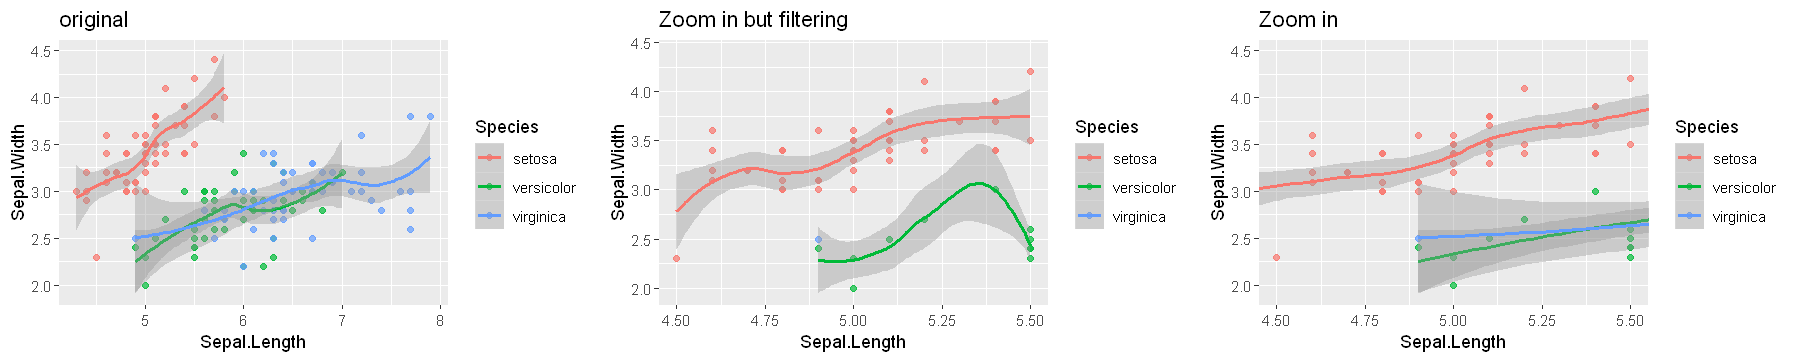

In [11]:
a1 <- ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, col = Species)) + geom_point(alpha = .7) + geom_smooth() 

a2<- a1 + scale_x_continuous(limits = c(4.5,5.5)) + ggtitle("Zoom in but filtering")

a3<- a1 + coord_cartesian(xlim = c(4.5,5.5)) + ggtitle("Zoom in")

options(repr.plot.width=15, repr.plot.height=3)
grid.arrange(a1 + ggtitle("original"), a2, a3, nrow = 1)


#### 2.1.1) Zooming In
You saw different ways of using the coordinates layer to zoom in. In this exercise, we'll compare some of the techniques again.

As usual, you'll be working with the mtcars dataset, which is already cleaned up for you (cyl and am are categorical variables). Also p, a ggplot object you coded in the previous chapter, is already available. Execute p in the console to check it out.

**Exercise**

- Extend `p` with a `scale_x_continuous()` with limits = c(3, 6) and expand = c(0, 0). What do you see?
- Try again, this time with `coord_cartesian()`: Set the xlim argument equal to c(3, 6). Compare the two plots.

In [17]:
mtcars$cyl <- as.factor(mtcars$cyl)
mtcars$am <- as.factor(mtcars$am)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 12 rows containing non-finite values (stat_smooth)."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  3.168"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  4e-006"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 3.168"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.002"Warning message in simpleLoess(y, x, w, span, degree = degree, 

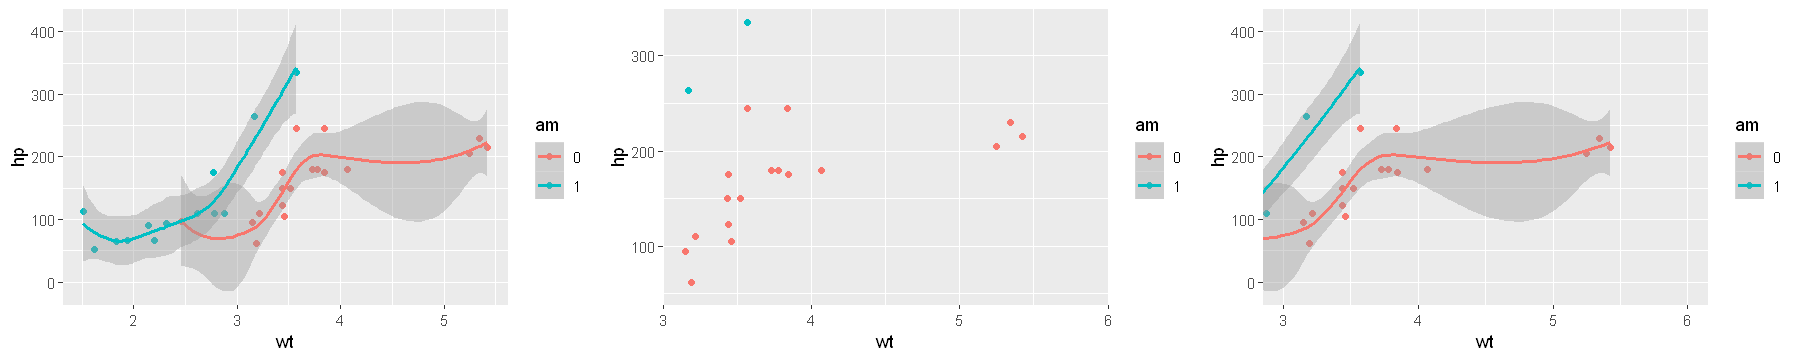

In [18]:
library(ggplot2)
#library(repr)
# Change plot size to 4 x 3
#options(repr.plot.width=4, repr.plot.height=2)

# Basic ggplot() command, coded for you
p <- ggplot(mtcars, aes(x = wt, y = hp, col = am)) + geom_point() + geom_smooth()


# Add scale_x_continuous()
a2<-p + scale_x_continuous(limits = c(3,6), expand = c(0,0))

# Add coord_cartesian(): the proper way to zoom in
a3<-p + coord_cartesian(xlim = c(3,6))

options(repr.plot.width=15, repr.plot.height=3)
grid.arrange(p, a2, a3, nrow = 1)

#### 2.1.2) Aspect Ratio
We can set the aspect ratio of a plot with `coord_fixed()` or `coord_equal()`. Both use ratio = 1 as a default. A 1:1 aspect ratio is most appropriate when two continuous variables are on the same scale, as with the iris dataset.

All variables are measured in centimeters, so it only makes sense that one unit on the plot should be the same physical distance on each axis. This gives a more truthful depiction of the relationship between the two variables since the aspect ratio can change the angle of our smoothing line. This would give an erroneous impression of the data.

Of course the underlying linear models don't change, but our perception can be influenced by the angle drawn.

**Exercise**

- Complete the basic scatter plot function using the iris data frame to plot Sepal.Width onto the y aesthetic, Sepal.Length onto the x and Species onto col. You should understand all the other functions used in this plot call by now. This is saved in an object called base.plot.

- Write base.plot on a new line to print it out. Examine it: the plot is drawn to the dimensions of the graphics device.

- Add a coord_equal() layer to force a 1:1 aspect ratio
    
Note: As a rule of thumb you'll want to use a 1:1 aspect ratio when your axes show the same scales, but there are always exceptions    

*Anwers*

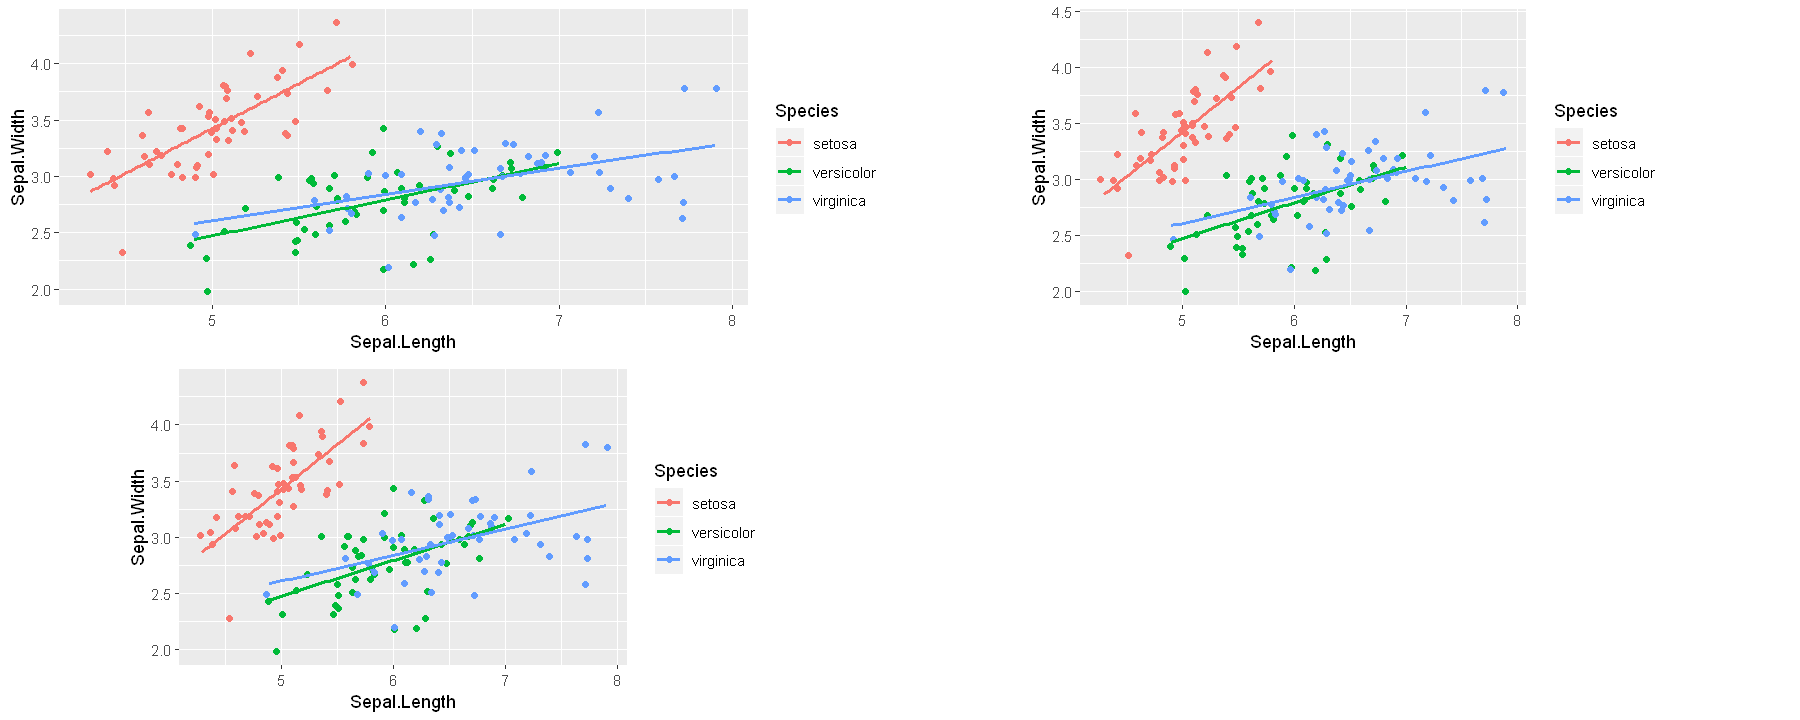

In [4]:
# Complete basic scatter plot function
base.plot <- ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, col = Species)) + geom_jitter() + 
geom_smooth(method = "lm", se = FALSE)

# Plot base.plot: default aspect ratio
#base.plot

# Fix aspect ratio (1:1) of base.plot
a2<-base.plot + coord_equal()

#other option
a3<-base.plot + coord_fixed(ratio = 1)

options(repr.plot.width=15, repr.plot.height=6)
grid.arrange(base.plot,a2, a3 ,nrow = 2)

#### 2.1.3) Pie Charts
The `coord_polar()` function converts a planar x-y Cartesian plot to polar coordinates. This can be useful if you are producing **pie charts**.

We can imagine two forms for pie charts - the typical filled circle, or a colored ring.

As an example, consider the stacked bar chart shown in the viewer. Imagine that we just take the y axis on the left and bend it until it loops back on itself, while expanding the right side as we go along. We'd end up with a pie chart - it's simply a bar chart transformed onto a polar coordinate system.

Typical pie charts omit all of the non-data ink, which we'll learn about in the next chapter. Pie charts are not really better than stacked bar charts, but we'll come back to this point in the fourth chapter on best practices.

The mtcars data frame is available, with cyl converted to a factor for you.

**Exercise**

- Create a basic `stacked bar plot`. Since we have univariate data and `stat_bin()` requires an x aesthetic, we'll have to use a dummy variable. Set `x to 1` and map `cyl` onto fill. Assign the bar plot to wide.bar.

- Add a `coord_polar()` layer to `wide.bar`. Set the argument `theta` to "y". This specifies the axis which would be transformed to polar coordinates.

- Repeat the code for the stacked bar plot, but this time:

    - Set the width argument inside the geom_bar() function to 0.1 and
    - Use scale_x_continuous() to set the limits argument to c(0.5,1.5)). These two steps will add empty space aroung the bar on the x axis.
    - Assign this plot to thin.bar.

- Add a coord_polar() layer to thin.bar, as you did before. There's a ring structure instead of a pie!

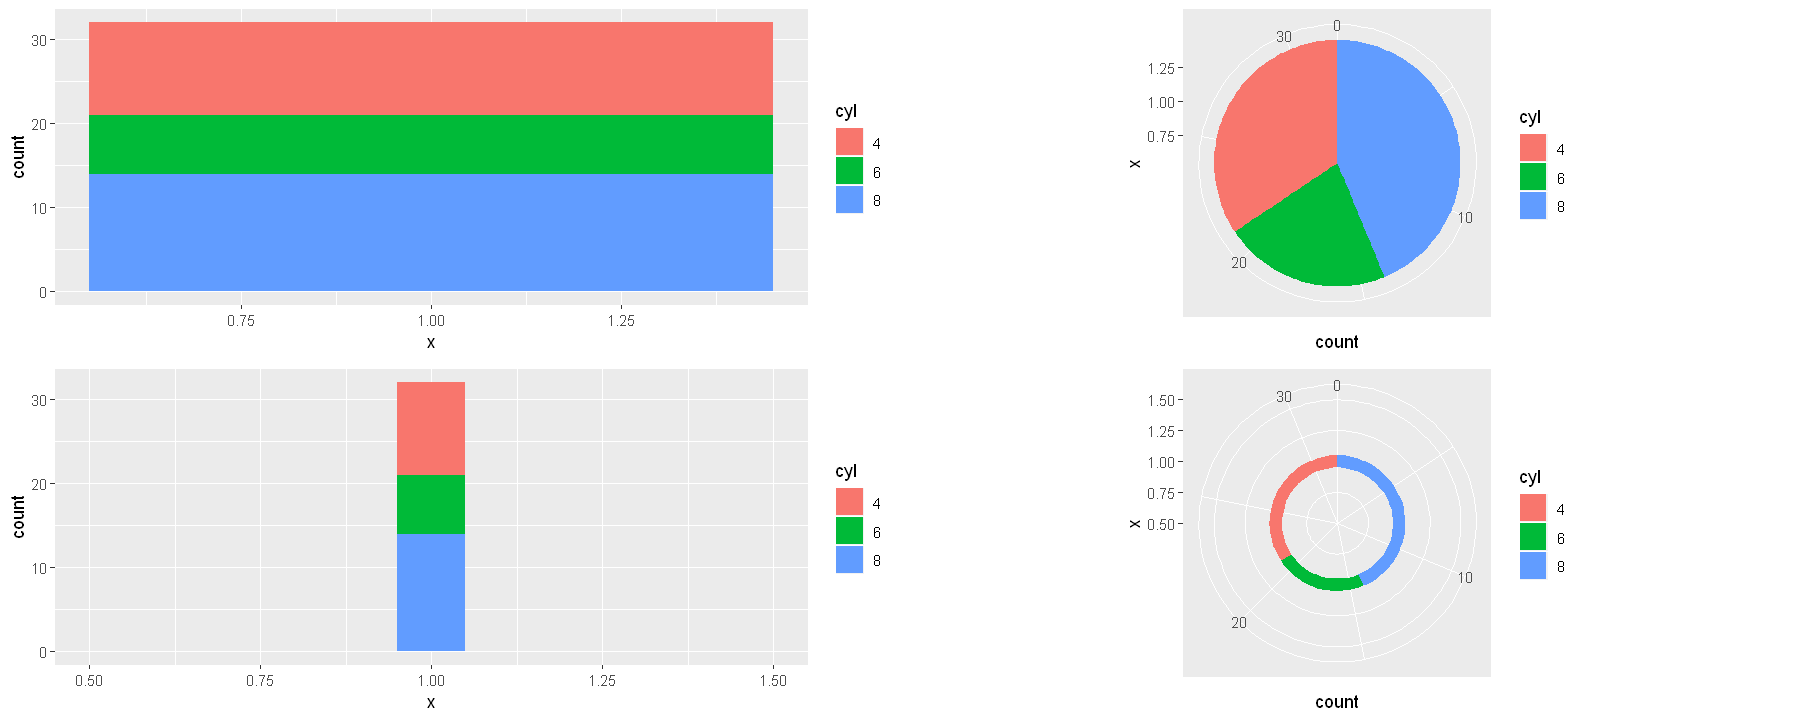

In [23]:
# Create a stacked bar plot: wide.bar
wide.bar <- ggplot(mtcars, aes(x = 1, fill = cyl)) +
              geom_bar()

# Convert wide.bar to pie chart
a2<-wide.bar +
  coord_polar(theta = "y")

# Create stacked bar plot: thin.bar
thin.bar <- ggplot(mtcars, aes(x = 1, fill = cyl)) +
              geom_bar(width = .1) +
              scale_x_continuous(limits = c(.5,1.5))

# Convert thin.bar to "ring" type pie chart
a4<-thin.bar + 
  coord_polar(theta = "y")

options(repr.plot.width=15, repr.plot.height=6)
grid.arrange(wide.bar,a2 ,thin.bar,a4,nrow = 2)

#### Additional) Aspect Ratio II(Old Version)
When values are not on the same scale it can be a bit tricky to set an appropriate aspect ratio. A classic William Cleveland (inventor of dot plots) example is the `sunspot`s data set. We have 3200 observations from 1750 to 2016.

`sun_plot` is a plot without any set aspect ratio. It fills up the graphics device.

To make aspect ratios clear, we've drawn an orange box that is 75 units high and 75 years wide. Using a 1:1 aspect ratio would make the box square. That aspect ratio would make things harder to see the oscillations: it is better to force a wider ratio

**Exercise**
- Fix the coordinates to a 1:1 aspect ratio.
- The y axis is now unreadably small. Make it bigger!
    - Change the aspect ratio to 20:1. This is the aspect ratio recommended by Cleveland to help make the trend among oscillations easiest to see.

*answer*


Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


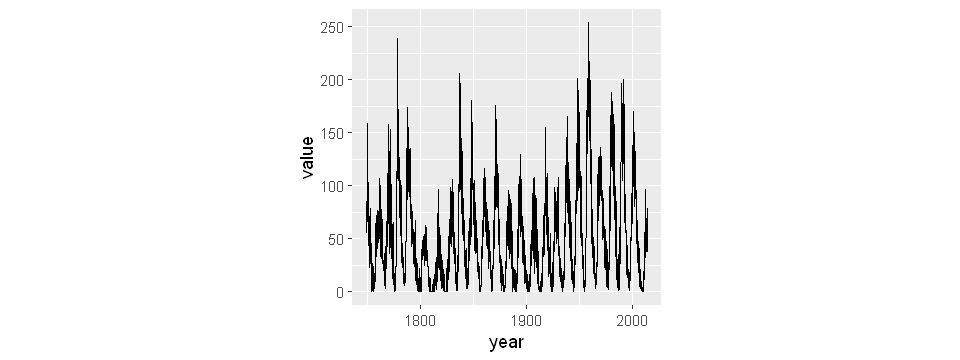

In [12]:
library(zoo)
sunspot.m<-data.frame(year = index(sunspot.month),
                     value = reshape2::melt(sunspot.month)$value)
sun_plot<-ggplot(sunspot.m, aes(year, value)) + geom_line() + coord_fixed()


a2<-sun_plot +
  coord_fixed(ratio = 20)

options(repr.plot.width=8, repr.plot.height=3, nrow = 1)
sun_plot 

#a2


#### Additional) Expand and clip (Old Version)  
The `coord_*()` layer functions offer two useful arguments that work well together: `expand` and `clip`.

- `expand` sets a buffer margin around the plot, so data and axes don't overlap. Setting expand to 0 draws the axes to the limits of the data.
- `clip` decides whether plot elements that would lie outside the plot panel are displayed or ignored ("clipped").
When done properly this can make a great visual effect! We'll use theme_classic() and modify the axis lines in this example.

When done properly this can make a great visual effect! We'll use theme_classic() and modify the axis lines in this example.

**Exercise**
- Add Cartesian coordinates with zero expansion, to remove all buffer margins on both the x and y axes.
- Setting expand to 0 caused points at the edge of the plot panel to be cut off.
    - Set the clip argument to "off" to prevent this.
    - Remove the axis lines by setting the axis.line argument to element_blank() in the theme() layer function.

*answer*

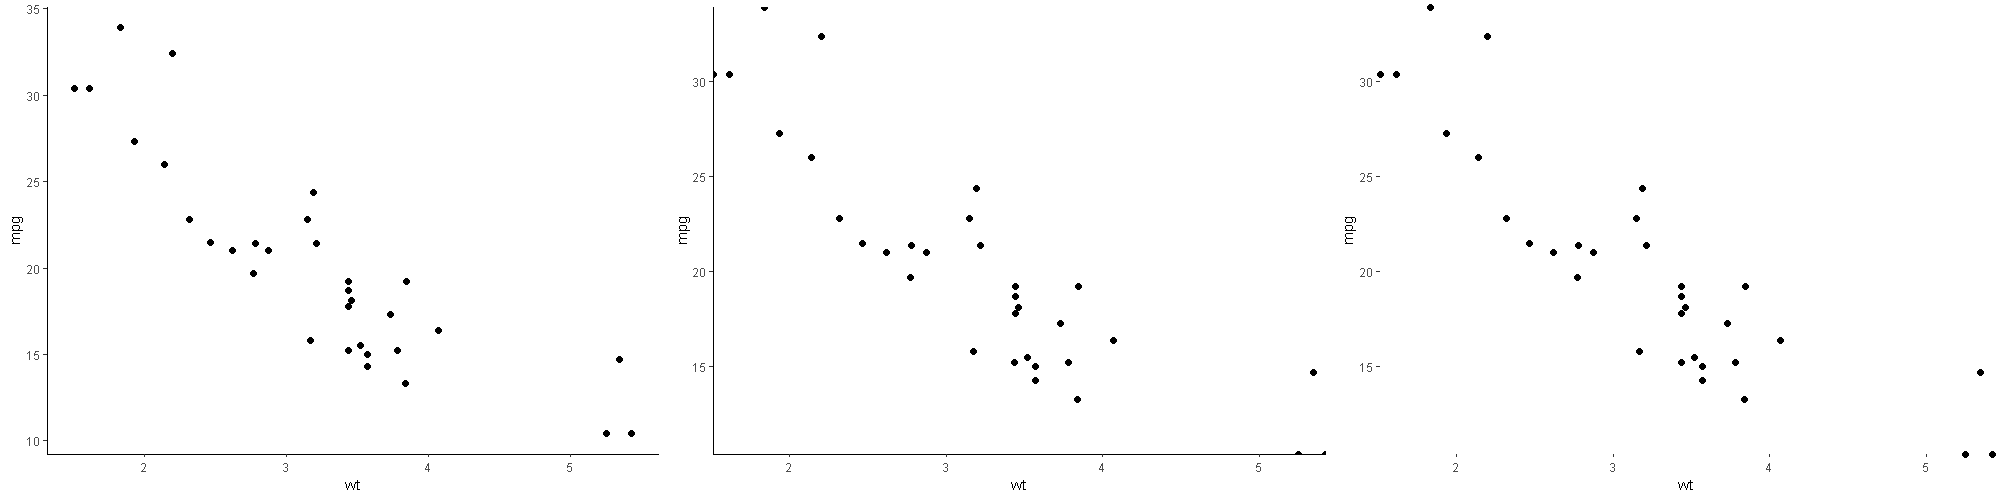

In [48]:
a1<-ggplot(mtcars, aes(wt, mpg)) +
  geom_point(size = 2) +
  theme_classic()

a2<-ggplot(mtcars, aes(wt, mpg)) +
  geom_point(size = 2) +
  # Add Cartesian coordinates with zero expansion
  coord_cartesian(expand = 0) +
  theme_classic()

a3<-ggplot(mtcars, aes(wt, mpg)) +
  geom_point(size = 2) +
  # Turn clipping off
  coord_cartesian(expand = 0, clip = "off") +
  theme_classic() +
  # Remove axis lines
  theme(axis.line = element_blank())

options(repr.plot.width=20, repr.plot.height=5)
grid.arrange(a1,a2, a3 ,nrow = 1)

#### Log-transforming scales (Additional)
Using `scale_y_log10()` and `scale_x_log10()` is equivalent to transforming our actual dataset before getting to `ggplot2`.

Using `coord_trans()`, setting `x = "log10"` and/or `y = "log10"` arguments, transforms the data after statistics have been calculated. The plot will look the same as with using `scale_*_log10()`, but the scales will be different, meaning that we'll see the original values on our log10 transformed axes. This can be useful since log scales can be somewhat unintuitive.

Let's see this in action with positively skewed data - the brain and body weight of 51 mammals from the msleep dataset.

**Exercise**

- Using the msleep dataset, plot the raw values of brainwt against bodywt values as a scatter plot.
- Add the scale_x_log10() and scale_y_log10() layers with default values to transform the data before plotting.
- Use coord_trans() to apply a "log10" transformation to both the x and y scales.

*answer*

In [51]:
data(msleep)

Warning message:
"Removed 27 rows containing missing values (geom_point)."Warning message:
"Removed 27 rows containing missing values (geom_point)."Warning message:
"Removed 27 rows containing missing values (geom_point)."

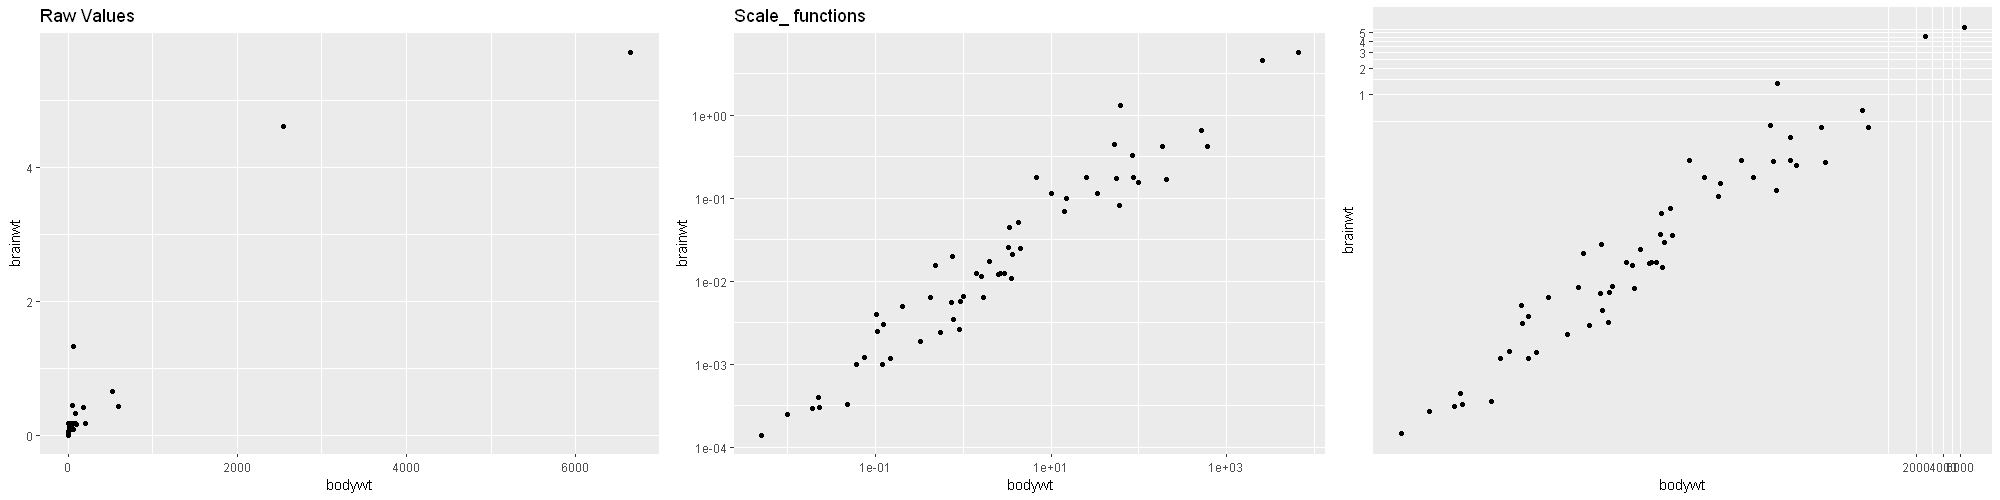

In [52]:
# Produce a scatter plot of brainwt vs. bodywt
a1<-ggplot(msleep, aes(bodywt,brainwt)) +
  geom_point() +
  ggtitle("Raw Values")

# Add scale_*_*() functions
a2<-ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10() +
  ggtitle("Scale_ functions")

# Perform a log10 coordinate system transformation
a3<-ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  coord_trans(x = "log10", y = "log10")

options(repr.plot.width=20, repr.plot.height=5)
grid.arrange(a1,a2, a3 ,nrow = 1)

#### Adding stats to transformed scales (Additional)
In the last exercise, we saw the usefulness of the **coord_trans()** function, but be careful! Remember that statistics are calculated on the untransformed data. A linear model may end up looking not-so-linear after an axis transformation. Let's revisit the two plots from the previous exercise and compare their linear models.

**Exercise**
- Add log10 transformed scales to the x and y axes.
- Add a log10 coordinate transformation for both the x and y axes.
    - Do you notice the difference between the two plots?

*Anwers*

Warning message:
"Removed 27 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 27 rows containing missing values (geom_point)."Warning message:
"Removed 27 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 27 rows containing missing values (geom_point)."

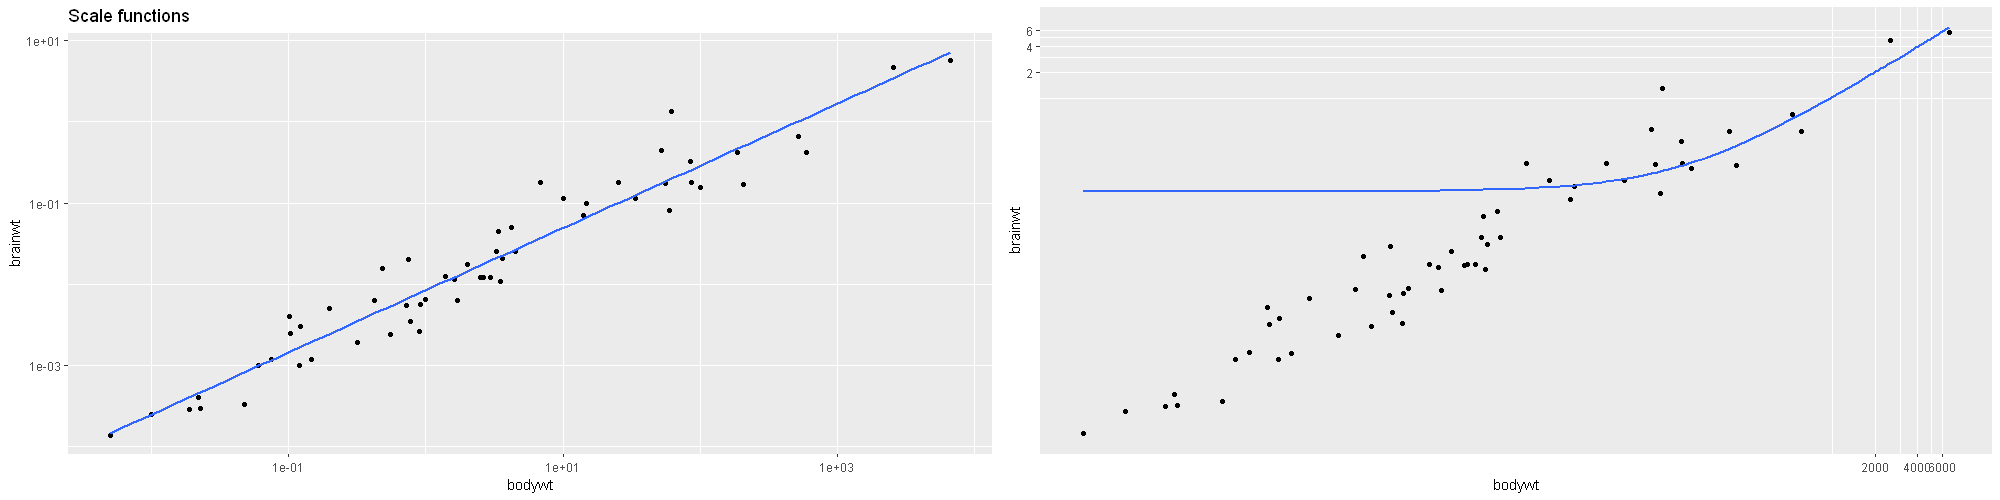

In [54]:
# Plot with a scale_*_*() function:
a1<-ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a log10 x scale
  scale_x_log10() +
  # Add a log10 y scale
  scale_y_log10() +
  ggtitle("Scale functions")

# Plot with transformed coordinates
a2<-ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a log10 coordinate transformation for x and y axes
  coord_trans(x = "log10", y = "log10")

options(repr.plot.width=20, repr.plot.height=5)
grid.arrange(a1,a2, nrow=1)

### 2.2) Facets Layer
The idea is that we can split up a large, complex plot, to produce multiple smaller plot that have the exact same coordinate system on each plot we present different datasets so as to compare them more easily, facet grid takes a formula argument using a tilde, the variable specified on the left dictates the rows and the variables specified on the right dictates how columns will be split up (rows~colums)

#### 2.2.1) Facets: the basics
The most straightforward way of using facets is `facet_grid()`. Here we just need to specify the categorical variable to use on rows and columns using standard R formula notation (rows ~ columns).

Other way is: 

    plot +
      facet_grid(rows = vars(A), cols = vars(B))

    Modern notation	                               Formula notation
    facet_grid(rows = vars(A))	                   facet_grid(A ~ .)
    facet_grid(cols = vars(B))	                   facet_grid(. ~ B)
    facet_grid(rows = vars(A), cols = vars(B))	   facet_grid(A ~ B)


Notice that we can also take advantage of ordinal variables by positioning them in the correct order as columns or rows, as is the case with the number of cylinders. Get some hands-on practice in this exercise; ggplot2 is already loaded for you and mtcars is available. The variables cyl and am are factors. However, this is not necessary for facets; ggplot2 will coerce variables to factors in this case

**Exercise:**

Starting from the basic scatter plot, use facet_grid() and the formula notation to facet the plot in three different ways:

- Rows by am.
- Columns by cyl.
- Rows and columns by am and cyl.
Remember, when faceting in only one direction us . to specify nothing for the unused direction.
    
*ansewer*

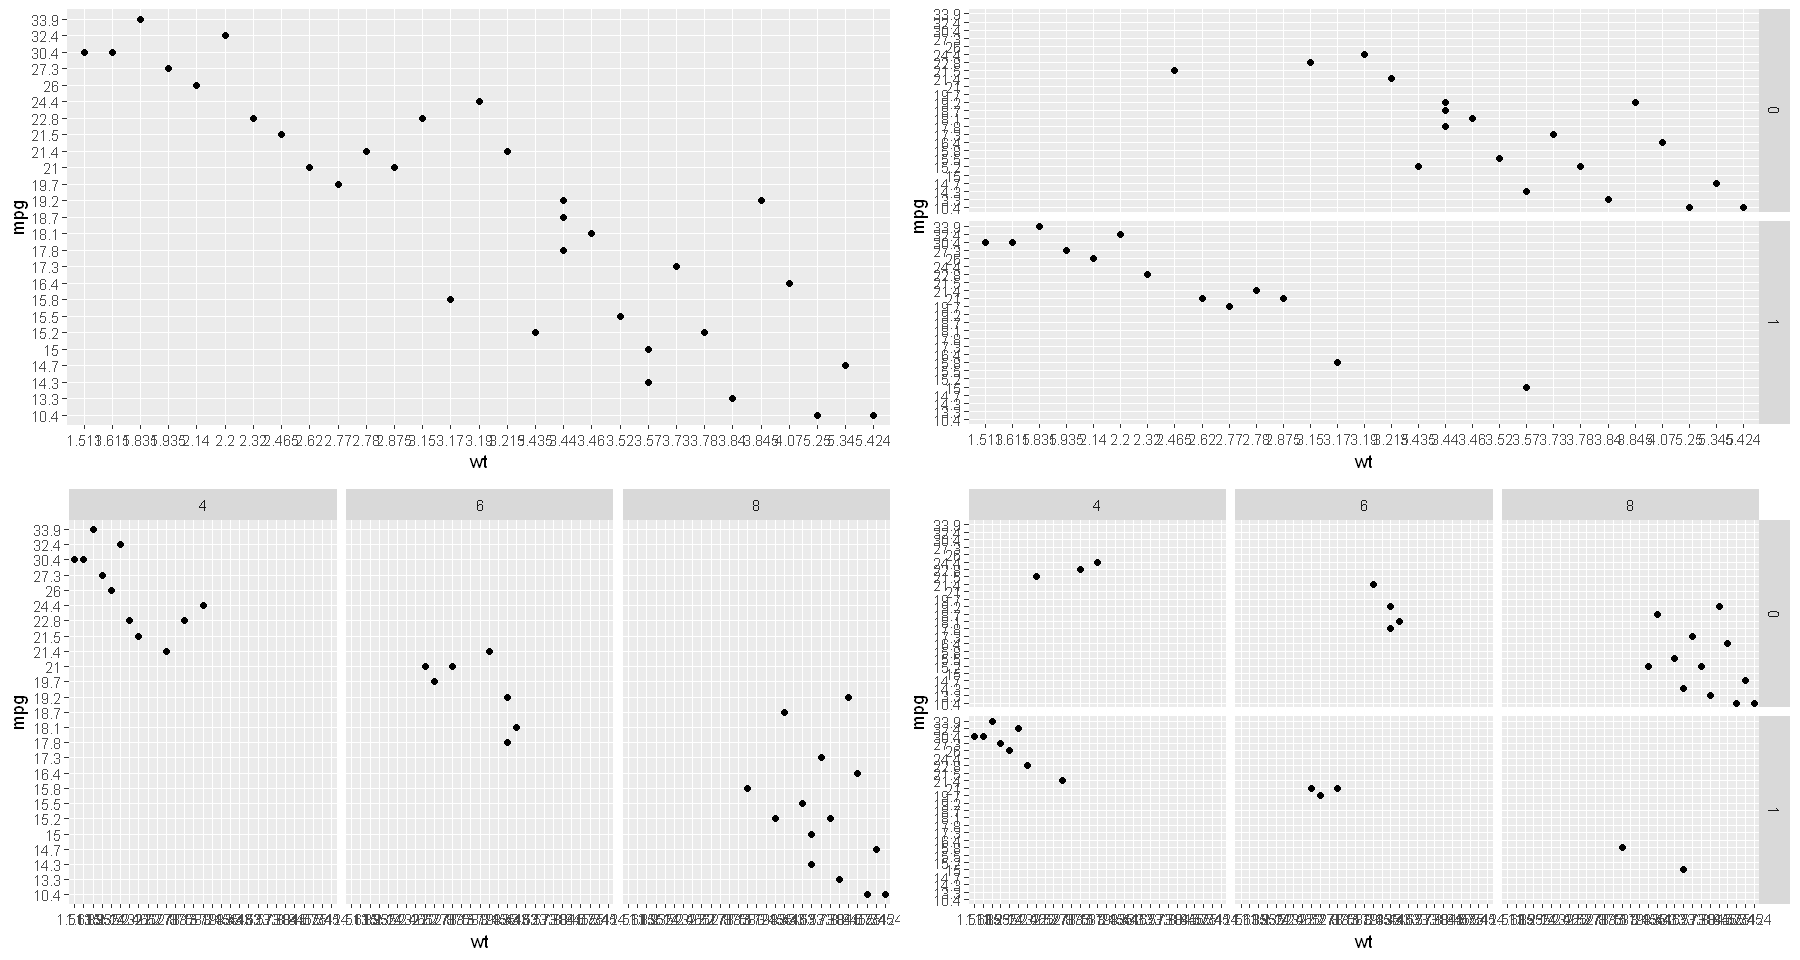

In [6]:
mtcars$cyl<-as.factor(mtcars$cyl)
#mtcars$mpg<-as.factor(mtcars$mpg)
mtcars$am<-as.factor(mtcars$am)

p <- ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point()

# 1 - Separate rows according to transmission type, am
a2<-p +
  facet_grid(am ~ .)

# 2 - Separate columns according to cylinders, cyl
a3<-p +
  facet_grid(. ~ cyl)

# 3 - Separate by both columns and rows 
a4<-p +
  facet_grid(am ~ cyl)

options(repr.plot.width=15, repr.plot.height=8)
grid.arrange(p,a2,a3,a4,nrow = 2)


#### 2.2.2) Many variables
Facets are another way of presenting categorical variables. Recall that we saw all the ways of combining variables, both categorical and continuous, in the aesthetics chapter. Sometimes it's possible to overdo it. Here we'll present a plot with 6 variables and see if we can add even more.

Let's begin by using a trick to map two variables onto two color scales - hue and lightness. We combine cyl and am into a single variable cyl_am. To accommodate this we also make a new color palette with alternating red and blue of increasing darkness. This is saved as myCol. If you are not familiar with these steps, execute the code piece-by-piece.

**Exercise**

- Beginning with the basic scatter plot:
    - Add a col aesthetic for cyl_am inside the existing aes() function.
    - Add a scale_color_manual() layer using the vector myCol for the values argument.
- Copy your scatter plot code from the previous instruction.
    - Add a facet_grid() layer, facetting the plot according to gear on rows and vs on columns (0 is a V-engine and 1 is a straight engine).
    - Now we have 6 variables in total (4 categorical variables and 2 continuous variables). The plot is still readable, but it's starting to get difficult.
- Try to add one more variable, using size. Map disp, the displacement volume from each cylinder, onto the size aesthetic inside the existing aes() function.

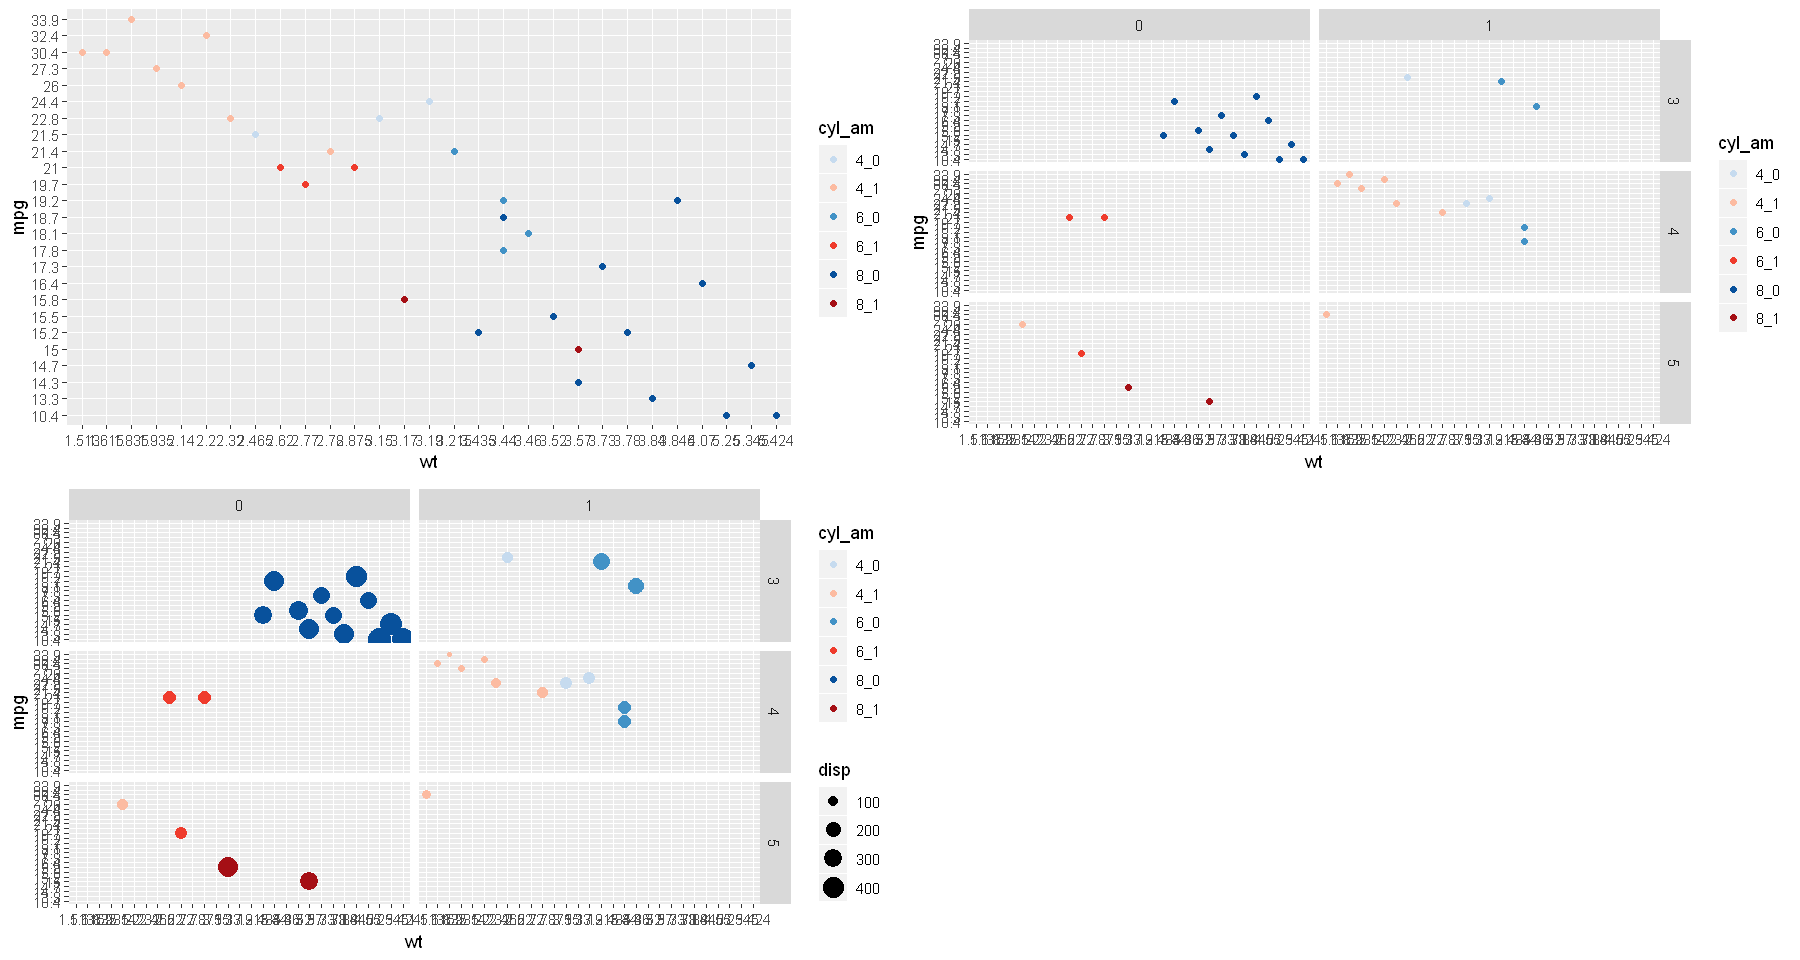

In [8]:
# Code to create the cyl_am col and myCol vector
mtcars$cyl_am <- paste(mtcars$cyl, mtcars$am, sep = "_")
myCol <- rbind(brewer.pal(9, "Blues")[c(3,6,8)],
               brewer.pal(9, "Reds")[c(3,6,8)])

# Map cyl_am onto col
a1<-ggplot(mtcars, aes(x = wt, y = mpg, color = cyl_am )) +
  geom_point() +
  # Add a manual colour scale
  scale_color_manual(values = myCol)

  
# Grid facet on gear vs. vs
a2<-ggplot(mtcars, aes(x = wt, y = mpg, color = cyl_am )) +
  geom_point() +
  # Add a manual colour scale
  scale_color_manual(values = myCol) + facet_grid(gear~vs)


# Also map disp to size
a3<-ggplot(mtcars, aes(x = wt, y = mpg, color = cyl_am, size = disp )) +
  geom_point() +
  # Add a manual colour scale
  scale_color_manual(values = myCol) + facet_grid(gear~vs)


options(repr.plot.width=15, repr.plot.height=8)
grid.arrange(a1,a2,a3,nrow = 2)


#### 2.2.3) Dropping levels
When you have a categorical variable with many levels which are not all present in each sub-group of another variable, it may be desirable to drop the unused levels. As an example let's return to the mammalian sleep dataset, `mamsleep`. It is available in your workspace.

The variables of interest here are name, which contains the full popular `name` of each animal, and `vore`, the eating behavior. Each animal can only be classified under one eating habit, so if we facet according to `vore`, we don't need to repeat the full list in each sub-plot.

**Exercise**

- A basic plot, object p, is defined for you. time is mapped onto the x, name onto the y and sleep onto the col aesthetics.
To see the plot execute p.
- Facet p by rows according to vore. If you look at the resulting plot, you'll notice that there are a lot of lines where no data is available.
- Extend facet_grid with scale = "free_y" and space = "free_y" to

*answer*

Don't know how to automatically pick scale for object of type function. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
ERROR while rich displaying an object: Error: Aesthetics must be valid data columns. Problematic aesthetic(s): x = time. 
Did you mistype the name of a data column or forget to add stat()?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](ob

Don't know how to automatically pick scale for object of type function. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
ERROR while rich displaying an object: Error: Aesthetics must be valid data columns. Problematic aesthetic(s): x = time. 
Did you mistype the name of a data column or forget to add stat()?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](ob

Don't know how to automatically pick scale for object of type function. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
ERROR while rich displaying an object: Error: Aesthetics must be valid data columns. Problematic aesthetic(s): x = time. 
Did you mistype the name of a data column or forget to add stat()?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](ob

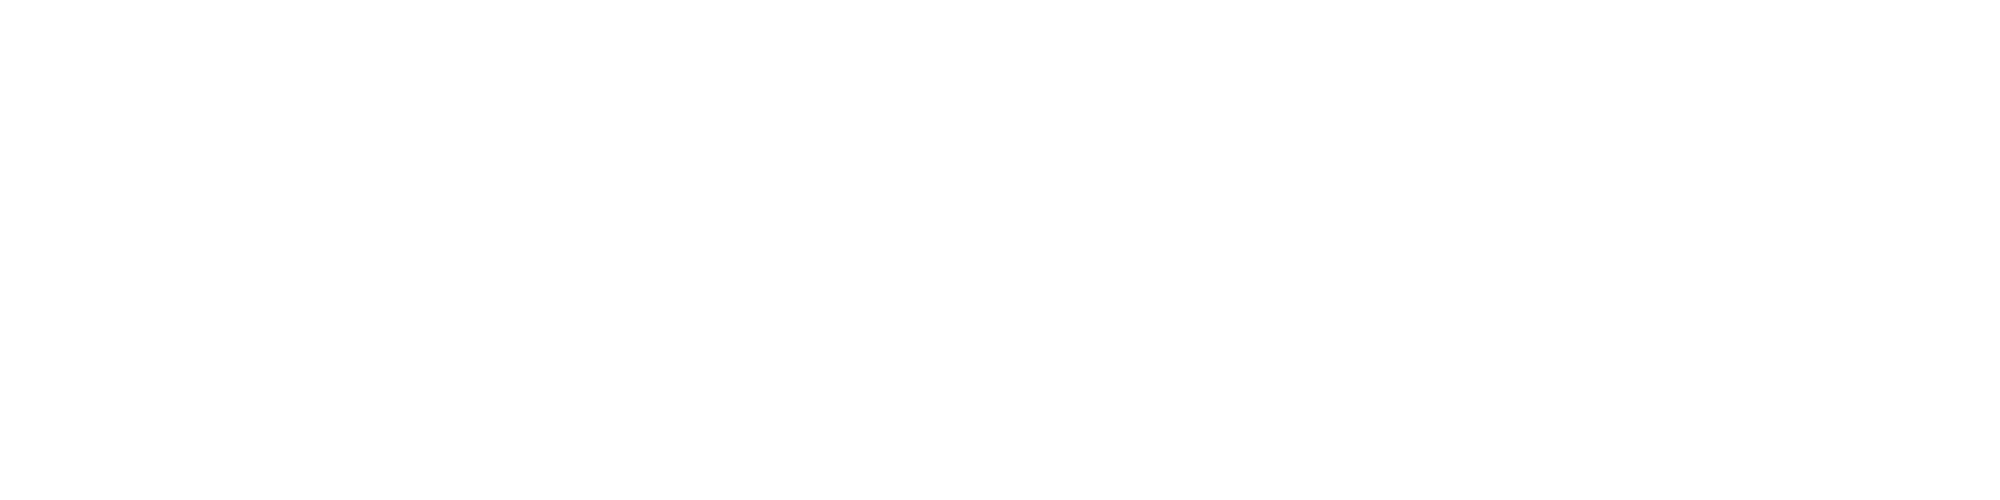

In [56]:
# Basic scatter plot
p <- ggplot(mamsleep, aes(x = time, y = name, col = sleep)) +
  geom_point()
  
# Execute to display plot
p

# Facet rows accoding to vore
p +
  facet_grid(vore~.)

# Specify scale and space arguments to free up rows
p +
  facet_grid(vore ~ ., scale= "free_y", space = "free_y")

#### (video) Facet labels and order (Additional)
Now we'll see how to labeling and arranging facets, we'll change some variables our original dataset `msleep`.

In [77]:
data(msleep)
msleep2<- msleep %>% mutate(brainwt_log = log10(brainwt), bodywt_log=log10(bodywt)) %>% 
filter(!is.na(conservation) & !is.na(vore))

In [78]:
msleep2<-filter(msleep2,conservation != 'cd')
msleep2$conservation<-factor(msleep2$conservation)
#is.na(msleep2$conservation)
#unique(msleep2$conservation)
#msleep2$conservation %in% c('cd')


Warning message:
"Removed 16 rows containing missing values (geom_point)."

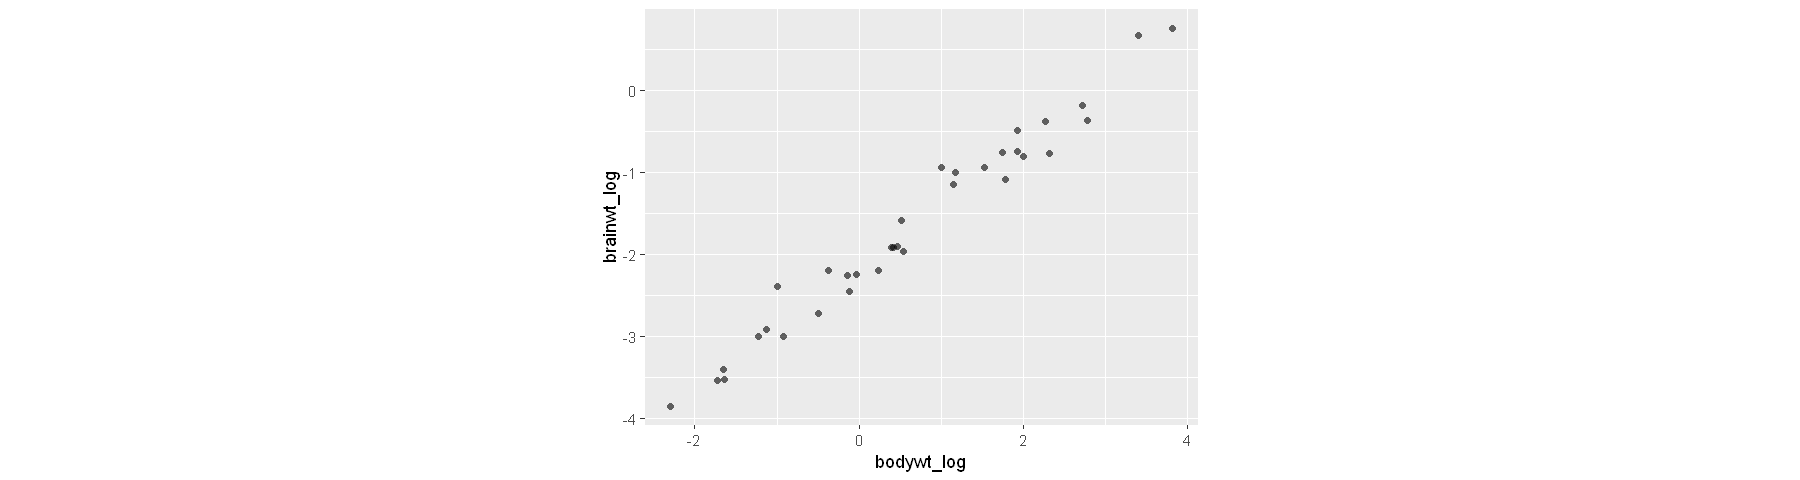

In [79]:
options(repr.plot.width=15, repr.plot.height=4)
#grid.arrange(a1,a2,a3,nrow = 2)

a1<- ggplot(msleep2, aes(bodywt_log, brainwt_log)) + geom_point(alpha = .6 , shape = 16) + coord_fixed()
a1

After that we split the plot by `vore` variable which show us 4 eating habits and conservation
It will bring two typical facet problems are that they are often poorly labels or that they are wrong or inapppropiate order. 

to change the second problem we need to go the data set directly the `forcats` package in the tidyverse collection contains some useful functions e.g `fct_recode` for relabeling level names in a factor variable (note: to show we need to reinitialize the plot) and if we need to change the order we can use `fct_relevel` 

Warning message:
"Unknown levels in `f`: domesticated, lc, nt, vu, en"Warning message:
"Removed 16 rows containing missing values (geom_point)."Warning message:
"Removed 16 rows containing missing values (geom_point)."Warning message:
"Removed 16 rows containing missing values (geom_point)."

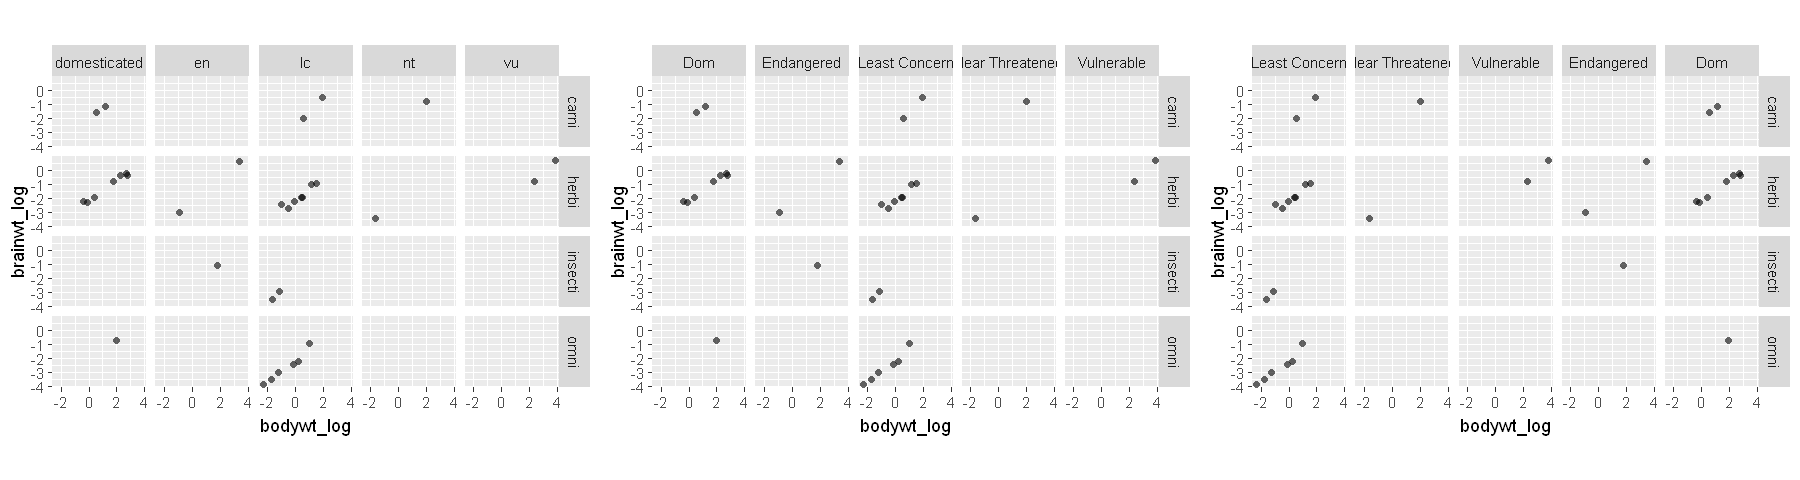

In [85]:
library(forcats)

a2<-a1 + facet_grid(vore~conservation, labeller = label_context)

#relabeling level names

a3<-ggplot(msleep2, aes(bodywt_log, brainwt_log)) + geom_point(alpha = .6 , shape = 16) + coord_fixed()

msleep2$conservation <- fct_recode(msleep2$conservation, 
                                  Dom = 'domesticated',
                                  'Least Concern' = 'lc',
                                  'Near Threatened' = 'nt',
                                  Vulnerable = 'vu',
                                  Endangered = 'en')

a4<-a3 + facet_grid(vore~conservation, labeller = label_context)

# change the order
msleep2$conservation <- fct_relevel(msleep2$conservation, 
                                    c('Least Concern','Near Threatened','Vulnerable','Endangered','Dom')
                                   )

a5<- ggplot(msleep2, aes(bodywt_log, brainwt_log)) + geom_point(alpha = .6 , shape = 16) + coord_fixed()
a6<- a5+ facet_grid(vore~conservation, labeller = label_context)

options(repr.plot.width=15, repr.plot.height=4)
grid.arrange(a2,a4,a6,nrow = 1)

#### Labeling facets (Additional) 
If your factor levels are not clear, your facet labels may be confusing. You can assign proper labels in your original data before plotting (see next exercise), or you can use the `labeller` argument in the facet layer.

The default value is

- `label_value`: Default, displays only the value
Common alternatives are:

- `label_both`: Displays both the value and the variable name
- `label_context`: Displays only the values or both the values and variables depending on whether multiple factors are faceted

**Exercise**

- Add a `facet_grid()` layer and facet cols according to the `cyl` using vars(). There is no labeling.
- Apply `label_both` to the `labeller` argument and check the output.
- Apply `label_context` to the labeller argument and check the output.
- In addition to `label_context`, let's facet by one more variable: `vs`.

*ansewer*

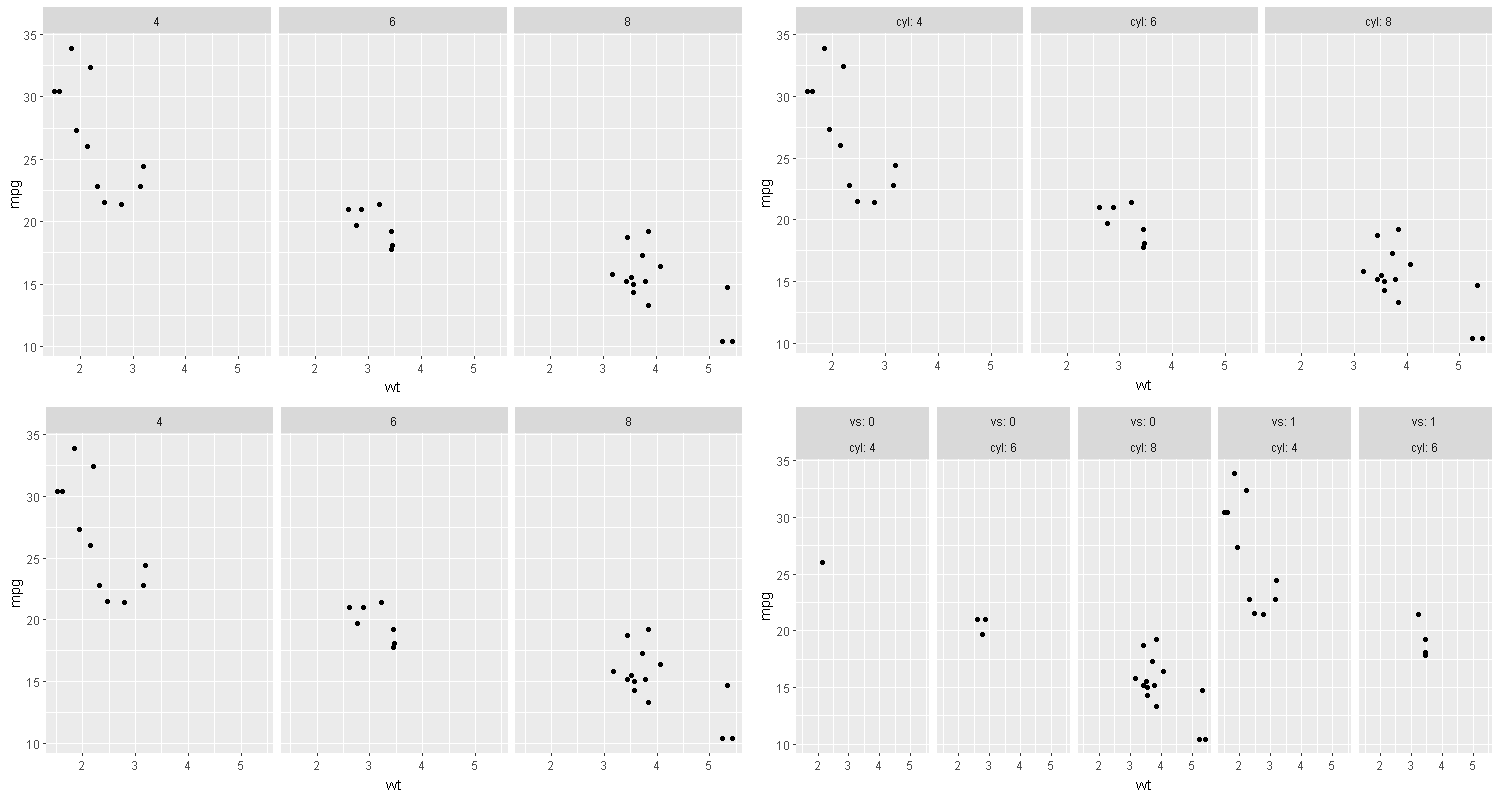

In [58]:
# Plot wt by mpg
a1<-ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # The default is label_value
  facet_grid(cols = vars(cyl))

a2<- # Plot wt by mpg
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # Displaying both the values and the variables
  facet_grid(cols = vars(cyl), labeller = label_both)

a3<-# Plot wt by mpg
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # Label context
  facet_grid(cols = vars(cyl), labeller = label_context)

a4<- # Plot wt by mpg
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # Two variables
  facet_grid(cols = vars(vs, cyl), labeller = label_context)

options(repr.plot.width=15, repr.plot.height=8)
grid.arrange(a1,a2,a3,a4,nrow = 2)



#### Setting order (Additional) 
If you want to change the order of your facets, it's best to properly define your factor variables before plotting.

Let's see this in action with the `mtcars` transmission variable `am`. In this case, `0 = "automatic"` and `1 = "manual"`.

Here, we'll make `am` a factor variable and relabel the numbers to proper names. The default order is alphabetical. To rearrange them we'll call `fct_rev()` from the `forcats` package to reverse the order.

**Exercise**

- Explicitly label the `0` and `1` values of the am column as "automatic" and "manual", respectively.
- Define a specific order using separate levels and labels arguments. Recall that 1 is "manual" and 0 is "automatic".

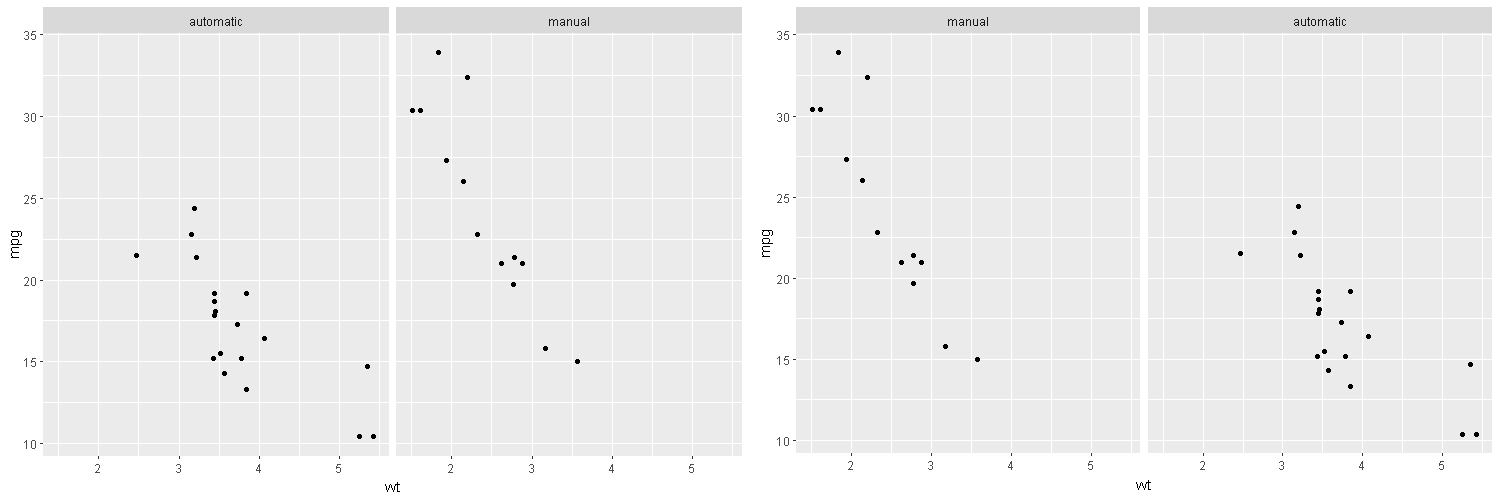

In [59]:
# Make factor, set proper labels explictly
mtcars$fam <- factor(mtcars$am, labels = c(`0` = "automatic",
                                           `1` = "manual"))

# Default order is alphabetical
a1<-ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  facet_grid(cols = vars(fam))



# Make factor, set proper labels explictly, and
# manually set the label order
mtcars$fam <- factor(mtcars$am,
                     levels = c(1, 0),
                     labels = c("manual", "automatic"))

# View again
a2<-ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  facet_grid(cols = vars(fam))



options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(a1,a2, nrow = 1)

#### (video)Facet plotting spaces  (Additional)



#### Variable plotting spaces I: continuous variables (Additional) 

By default every facet of a plot has the same axes. If the data ranges vary wildly between facets, it can be clearer if each facet has its own scale. This is achieved with the `scales` argument to `facet_grid()`.

- `"fixed"` (default): axes are shared between facets.
- `free`: each facet has its own axes.
- `free_x`: each facet has its own x-axis, but the y-axis is shared.
- `free_y`: each facet has its own y-axis, but the x-axis is shared.

When faceting by columns, `"free_y"` has no effect, but we can adjust the x-axis. In contrast, when faceting by rows, `"free_x"` has no effect, but we can adjust the y-axis.

**Exercise**
- Update the plot to facet columns by cyl.
- Update the faceting to free the x-axis scales. 
- Facet rows by cyl (rather than columns).
    - Free the y-axis scales (instead of x).
    
*Answer*    

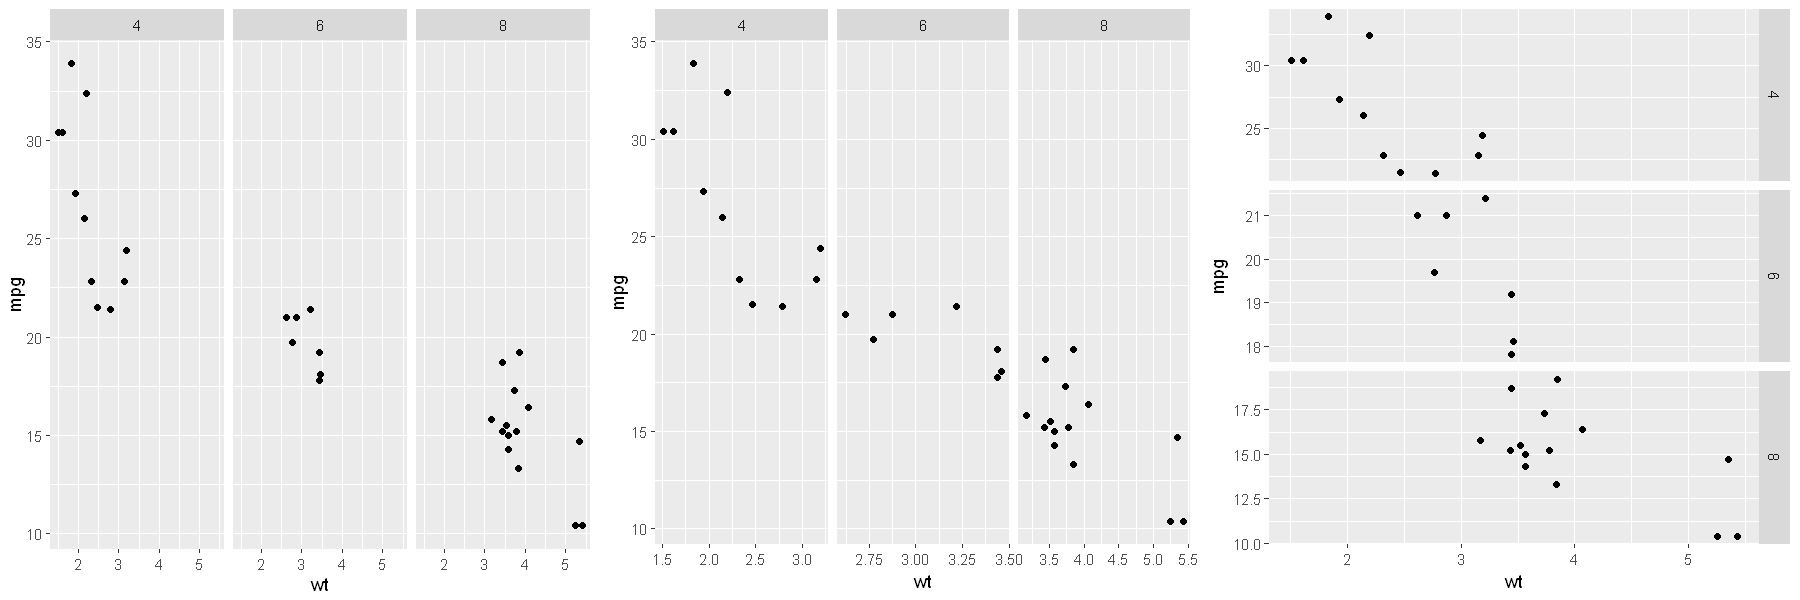

In [3]:
a1<-ggplot(mtcars, aes(wt, mpg)) +
  geom_point() + 
  # Facet columns by cyl 
  facet_grid(cols = vars(cyl))

a2<- ggplot(mtcars, aes(wt, mpg)) +
  geom_point() + 
  # Update the faceting to free the x-axis scales
  facet_grid(cols = vars(cyl), scales = "free_x")

a3<- ggplot(mtcars, aes(wt, mpg)) +
  geom_point() + 
  # Swap cols for rows; free the y-axis scales
  facet_grid(rows = vars(cyl), scales = "free_y")


options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(a1,a2,a3, nrow = 1)

#### Variable plotting spaces II: categorical variables (Additional) 
When you have a categorical variable with many levels which are not all present in each sub-group of another variable, it's usually desirable to drop the unused levels.

By default, each facet of a plot is the same size. This behavior can be changed with the `spaces` argument, which works in the same way as scales: `"free_x"` allows different sized facets on the x-axis, `"free_y"`, allows different sized facets on the y-axis, `"free"` allows different sizes in both directions.

**Exercise**
- Facet the plot by rows according to `gear` using `vars()`. Notice that every car is listed in every facet, resulting in many lines without data.
- To remove blank lines, set the `scales` and `space` arguments in `facet_grid()` to `free_y`.


*answer*

In [27]:
#head(mtcars)
mtcars$car<-rownames(mtcars)
mtcars$fam<-factor(c(1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1), levels = c(0,1))

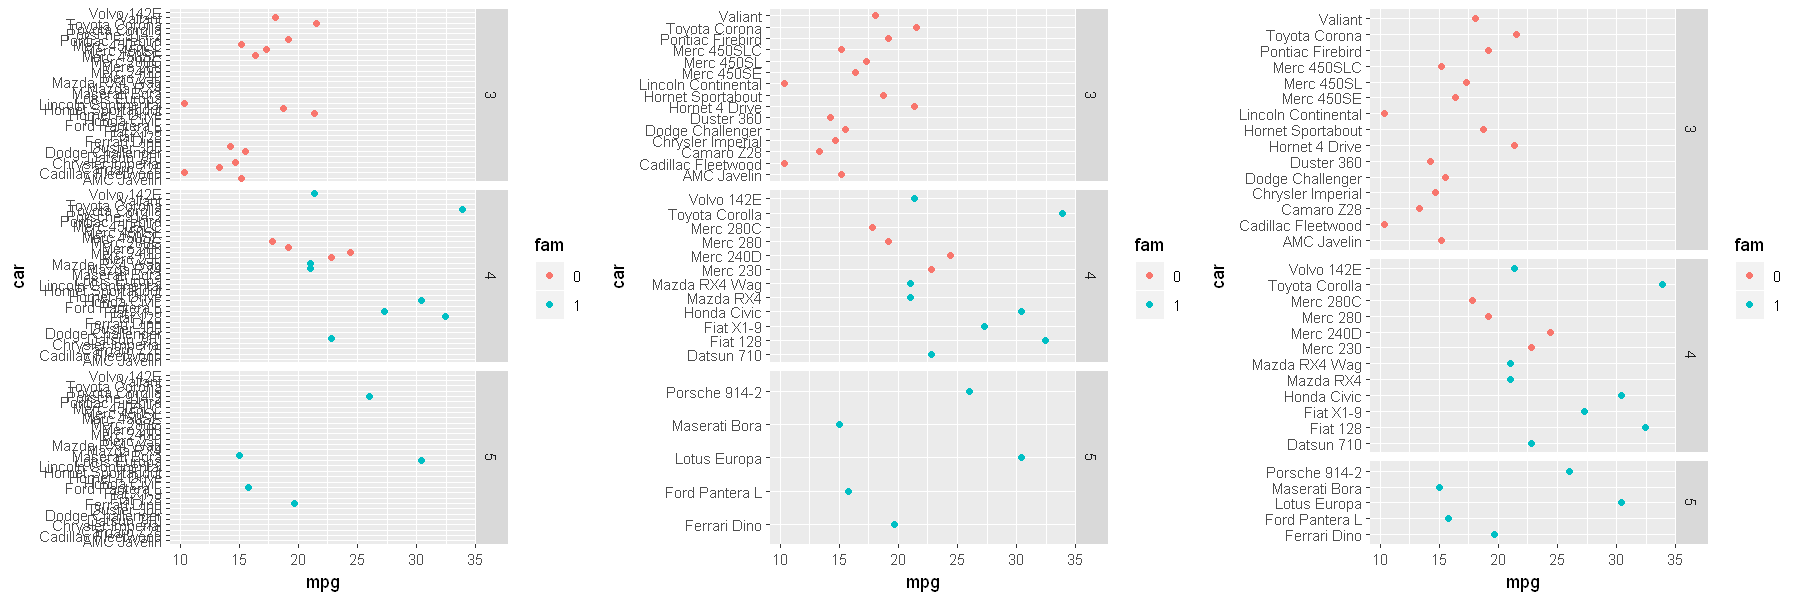

In [29]:
a1<-ggplot(mtcars, aes(x = mpg, y = car, color = fam)) +
  geom_point() +
  # Facet rows by gear
  facet_grid(rows = vars(gear))

#additional
a2<-ggplot(mtcars, aes(x = mpg, y = car, color = fam)) +
  geom_point() +
  # Free the y scales and space
  facet_grid(rows = vars(gear), scales = "free_y")

a3<-ggplot(mtcars, aes(x = mpg, y = car, color = fam)) +
  geom_point() +
  # Free the y scales and space
  facet_grid(rows = vars(gear), scales = "free_y", space = "free_y")


options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(a1,a2,a3, nrow = 1)

## 3) Themes
Now that you’ve built high-quality plots, it’s time to make them pretty. This is the last step in the data viz process. The Themes layer will enable you to make publication quality plots directly in R.

### 3.1) Themes from scratch
The themes layers controls all non-data ink on your plot, that means all visual elements which are not actually part of the data, visual elements can be classifed as one three different types: 
- text
- lines or 
- rectangle 

each type can modifed  by calling the appropiete function `element_text(), element_line() or element_rect()`, the theme layer allows us to modify not only the visual attributes of these elements like color, angle, and size, but also their positions.

To see how it works, consider the following plot, it's composed out a combination of data and lost of non-data embellishments.

in the next plot, we can see all the `text elements` on our plot, each element has a unique name and we can access all the text in general, all title in general, but also more and more specific items as plot, `legend` and `axis titles`, so how we can acces to these elements, all elements we discussed so far ar argument of the `theme` function and to modify each element we need to call the argument in the them function and use the appropriate element function to specify what we want to change in this case `element_text()`

<img src=./Imagenes/ggplot_theme_text.jpg style= "width: 50 px;"/>

it's within this function we manipulate things like size, color, alignment and angle of the text
Now talk about lines elements, it include the `tick` marks on the axes , the axis lines themselves and all grid line both major an minor, remember all these would be modify by the `theme` layer with the `element_line()`

the last one is all `rectangles` or specif background, it's the same logic. 

<img src=./Imagenes/ggplot_theme_line.jpg style="width: 100 px;"/>

we can access theses elements visual, to modify each element, we need to the argument in the them functions and use the appropriate element function to specify what we want to change, so we have many non-data elements to modify and although we have access to each item, we don´t need tod moify each individually, they inherit from each other in a hierarchy for example all text elements inherit from text, so if we changeed that argument in the theme layer, all downstream arguments would be affected,

<img src=./Imagenes/ggplot_theme_levels.jpg style="width: 50 px;"/>

the last element that we will discussed is `element_blank()` this way we borrowd all elements.

    theme(text = element_blank(), line = element_blank(), rect = element_blank())


#### 3.1.1) Rectangles
To understand all the arguments for the themes, you'll modify an existing plot over the next series of exercises.

Here you'll focus on the rectangles of the plotting object `z` that has already been created for you. If you type z in the console, you can check it out. The goal is to turn `z` into the plot in the viewer. Do this by following the instructions step by step.

**Exercise** 


- Plot 1: In the `theme()` function added to z, set the plot.background argument to `element_rect(fill = myPink)`. myPink is already available in the workspace for you.
- Plot 2: Expand your code for Plot 1 by adding a border to the `plot.background`. Do this by adding 2 arguments to the `element_rect()` function in `theme()`: `color` and `size`. Set them to `"black"` and `3`, respectively.
- Plot 3: we don't want the plot panels and legend to appear as they are in Plot 2. A short cut is to remove all rectangles, as defined in the theme object no_panels, and then draw the one we way in the way we want. Copy your `theme()` layer from Plot 2 and add it to no_panels.

*ansewer*

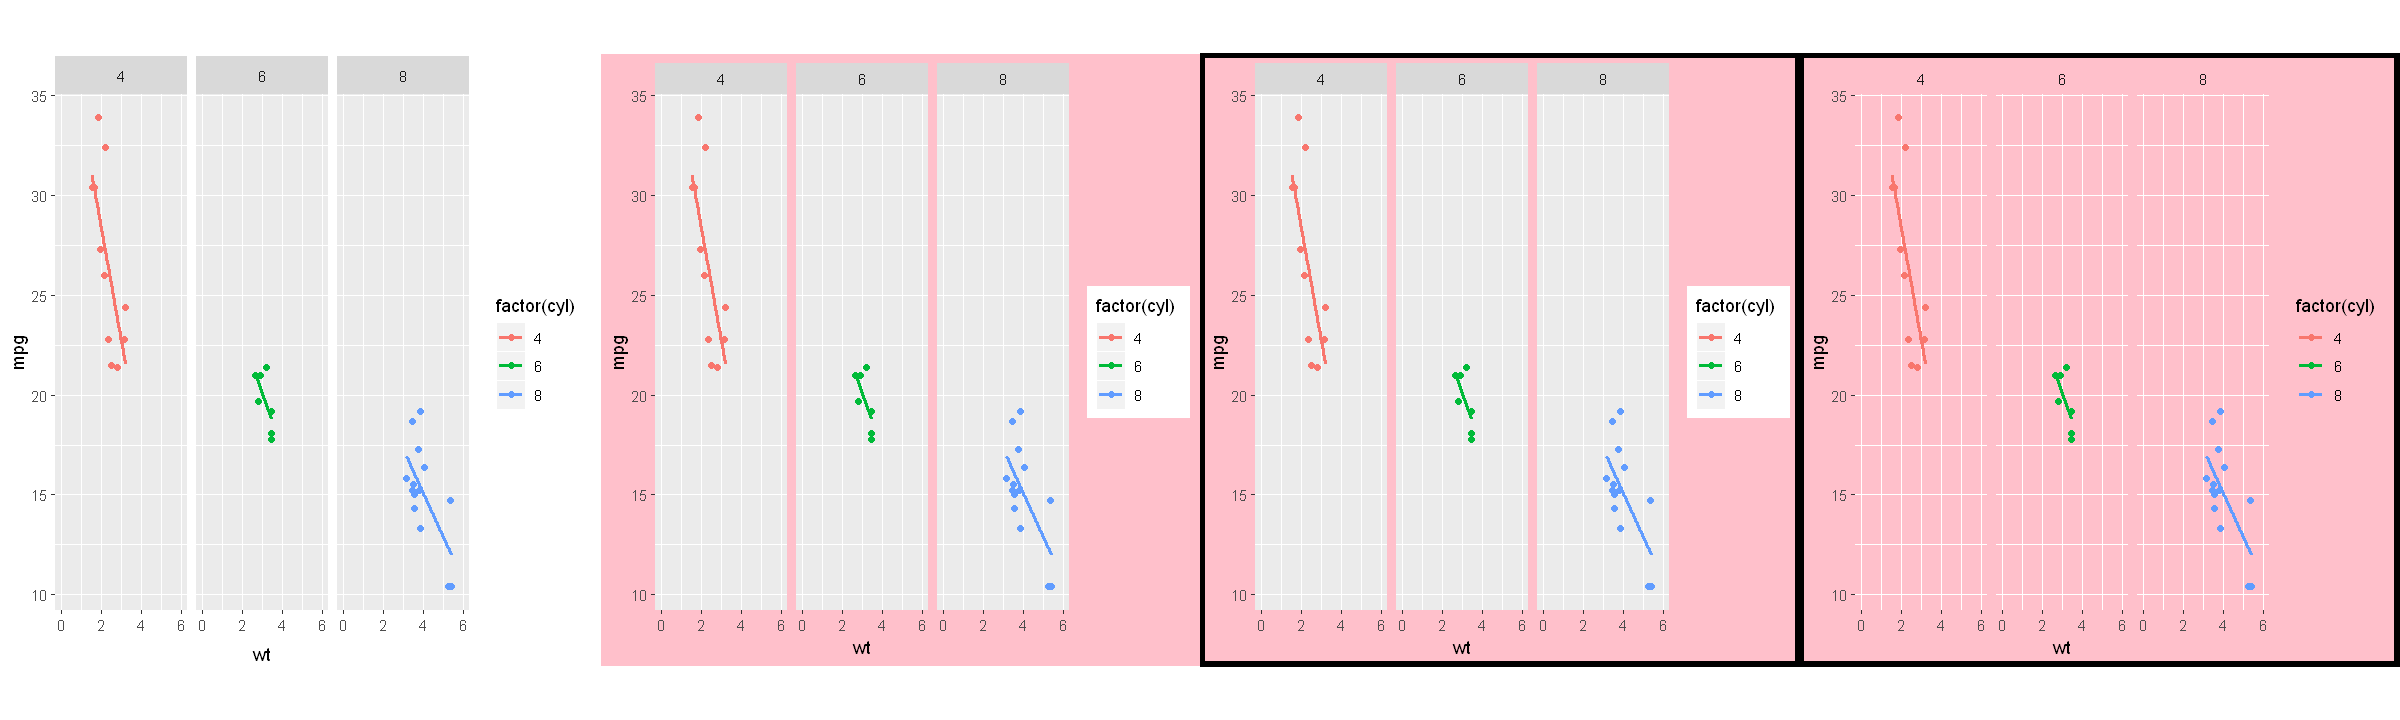

In [8]:
z<-ggplot(mtcars, aes(x= wt, y = mpg, color = factor(cyl))) + 
  geom_point() + facet_grid(.~factor(cyl)) + geom_smooth(method = lm, se = FALSE) + coord_equal() + 
  scale_x_continuous(limits = c(0,6))

a1<-z

myPink<-"pink"

# Plot 1: Change the plot background fill to myPink
a2<-z +
  theme(plot.background = element_rect(fill = myPink))

# Plot 2: Adjust the border to be a black line of size 3
a3<-z +
  theme(plot.background = element_rect(fill = myPink, color = "black", size = 3)) # expanded from plot 1

# Theme to remove all rectangles
no_panels <- theme(rect = element_blank())

# Plot 3: Combine custom themes
a4<-z +
  no_panels +
  theme(plot.background = element_rect(fill = myPink, color = "black", size = 3)) # from plot 2



options(repr.plot.width=20, repr.plot.height=6)
grid.arrange(a1,a2,a3,a4,nrow = 1)


#### 3.1.2)  Lines

To change the appearance of lines use the `element_line()` function.

The plot you created in the last exercise, with the fancy pink background, is available as the plotting object `z`. Your goal is to produce the plot in the viewer - no grid lines, but red axes and tick marks.

For each of the arguments that specify lines, use `element_line()` to modify attributes. e.g. `element_line(color = "red")`.

Remember, to remove a non-data element, use `element_blank()`.

**Exercise**

Starting with object `z`, add a `theme()` function to:

- remove the grid lines using the `panel.grid` argument.
- add `red` axis lines using the `axis.line` argument.
- change the tick marks to red using the `axis.ticks` argument, similar to how you specified `axis.line`.

*answer*

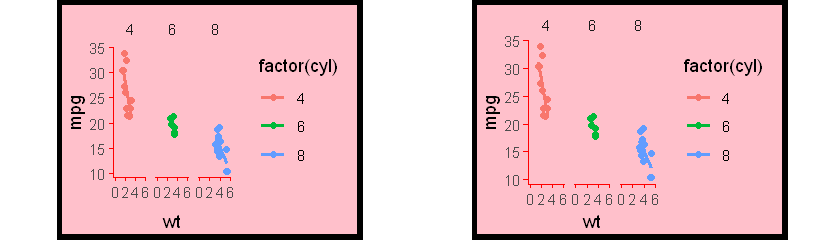

In [25]:
z <- z +
  no_panels +
  theme(plot.background = element_rect(fill = myPink, color = "black", size = 3))


a2<-z + 
  theme(panel.grid = element_blank(),
        axis.line = element_line(color = "red"),
        axis.ticks = element_line(color = "red"))



options(repr.plot.width=7, repr.plot.height=2)
grid.arrange(z,a2,nrow = 1)

#### 3.1.3)  Text
Next we can make the text on your plot prettier and easier to spot. You can do this through the element_text() function and by passing the appropriate arguments inside the theme() function.

As before, the plot you've created in the previous exercise is available as z. The plot you should end up with after successfully completing this exercises is shown in the viewer.

**Exercise**

Starting from z, add a theme() function to:

- Change the appearance of the strip text, that is the text in the facet strips. Specify strip.text with element_text(). The size of the text should be 16, the color should be myRed, a color that is predefined for you.
- Change the axis titles. Specify both axes with the axis.title argument and use element_text() to set the parameters: color = myRed, hjust = 0 (to put the text in the bottom left corner) and face = "italic".

Make the axis text black using the axis.text argument to do so.

*Answer*

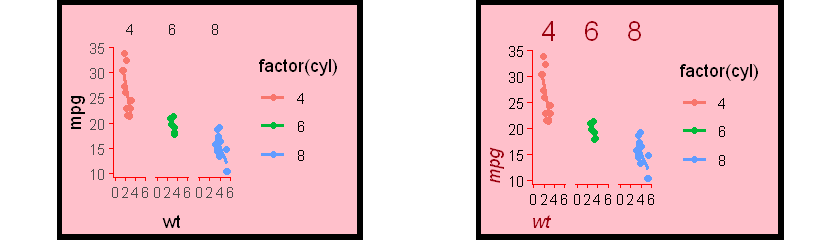

In [24]:

z <-z+theme(panel.grid = element_blank(),
        axis.line = element_line(color = "red"),
        axis.ticks = element_line(color = "red"))
myRed<-"#99000D"

# Extend z with theme() function and 3 args
a2<-z +
  theme(strip.text = element_text(size = 16, color = myRed),
        axis.title = element_text(color = myRed, hjust = 0, face = "italic"),
        axis.text = element_text(color = "black"))

options(repr.plot.width=7, repr.plot.height=2)
grid.arrange(z,a2,nrow = 1)

#### 3.1.4)  Legends
The themes layer also allows you to specify the appearance and location of legends.

The plot you've coded up to now is available as z. It's also displayed in the viewer. Solve the instructions and compare the resulting plots with the plot you started with.

**Exercise**

- Add a theme() function to z to change the legend's location. Do this by specifying the legend.position argument to be c(0.85, 0.85). This will make the legend appear in the top right of the plot, inside the third facet.
- Instead of a vertical list of legend entries, you might want to have the different entries next to each other. Starting from z, add a theme() function in which you specify legend.direction to be "horizontal".
- You can also change the locations of legends by name: set legend.position to "bottom".
- Finally, you can remove the legend entirely, by setting legend.position to "none".

*Answer*

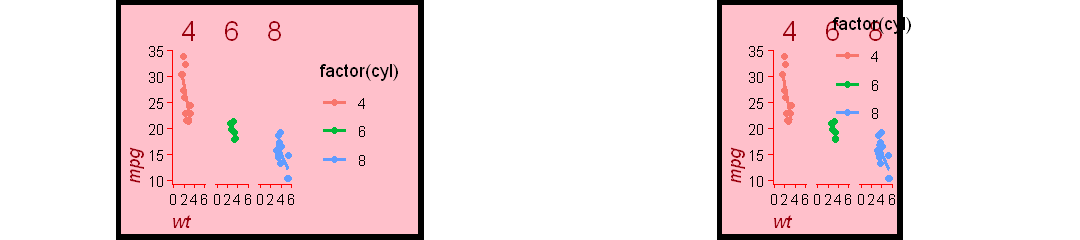

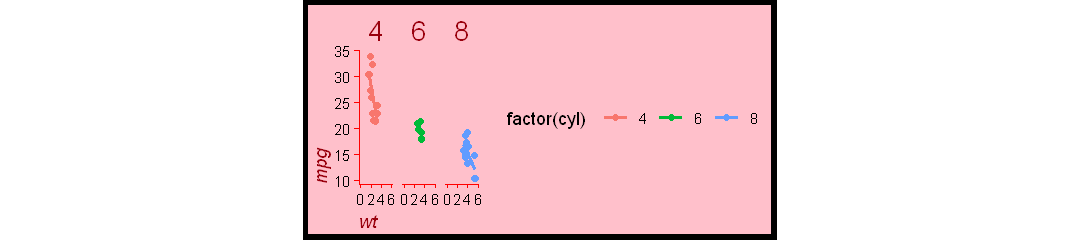

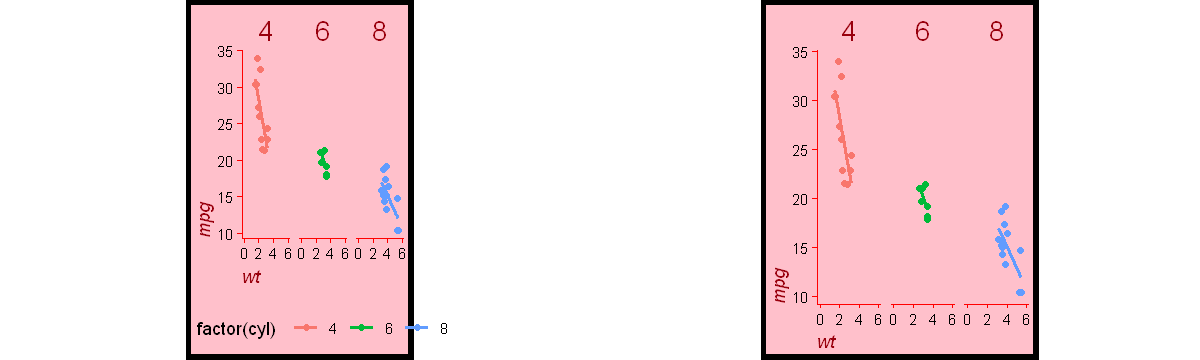

In [35]:
z <-z+theme(panel.grid = element_blank(),
        axis.line = element_line(color = "red"),
        axis.ticks = element_line(color = "red"))

myRed<-"#99000D"

# Extend z with theme() function and 3 args
z<-z +
  theme(strip.text = element_text(size = 16, color = myRed),
        axis.title = element_text(color = myRed, hjust = 0, face = "italic"),
        axis.text = element_text(color = "black"))
 
# Move legend by position
a3<-z +
  theme(legend.position = c(0.85,0.85))

# Change direction
a4<-z +
  theme(legend.direction = "horizontal")
  
# Change location by name
a5<-z +
  theme(legend.position = "bottom")

# Remove legend entirely
a6<-z +
  theme(legend.position = "none")

options(repr.plot.width=9, repr.plot.height=2)
grid.arrange(z,a3,nrow = 1)

a4 

options(repr.plot.width=10, repr.plot.height=3)
grid.arrange(a5,a6,nrow = 1)

#### 3.1.5)  Positions
The different rectangles of your plot have spacing between them. There's spacing between the facets, between the axis labels and the plot rectangle, between the plot rectangle and the entire panel background, etc. Let's experiment!

The last plot you created in the previous exercise, without a legend, is available as z.

**Exercise**

- Suppose you want to have more spacing between the different facets. You can control this by specifying `panel.spacing.x` inside a `theme()` function you add to z. For the argument value, you should pass a unit object. To achieve this, load the `grid` package with library(). Next, set `panel.spacing.x` to `unit(2, "cm")`.

- Copy, adapt and paste the plot command for the previous instruction: to adjust the plot margin, set `plot.margin` to `unit(c(1,2,1,1), "cm")` (spacing for top, right, bottom, and left margins).

*Answer*

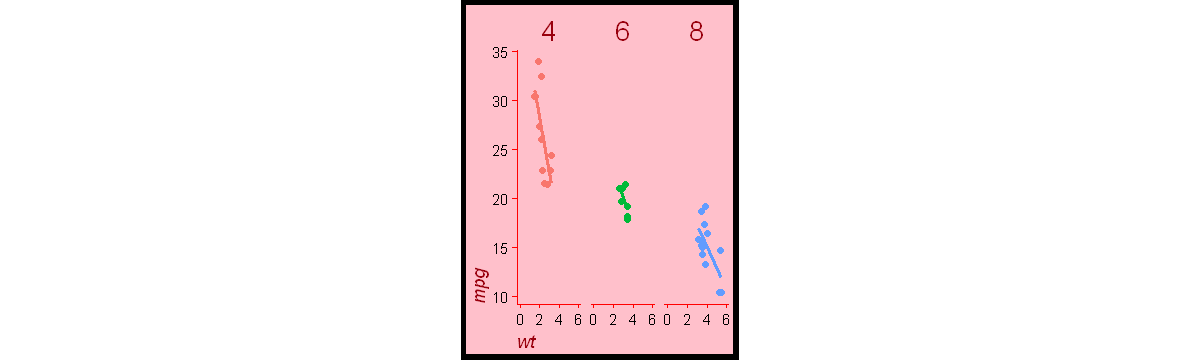

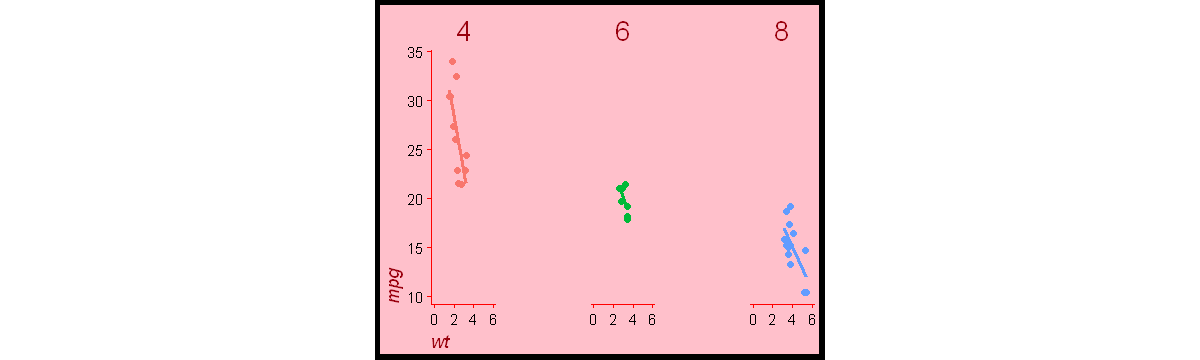

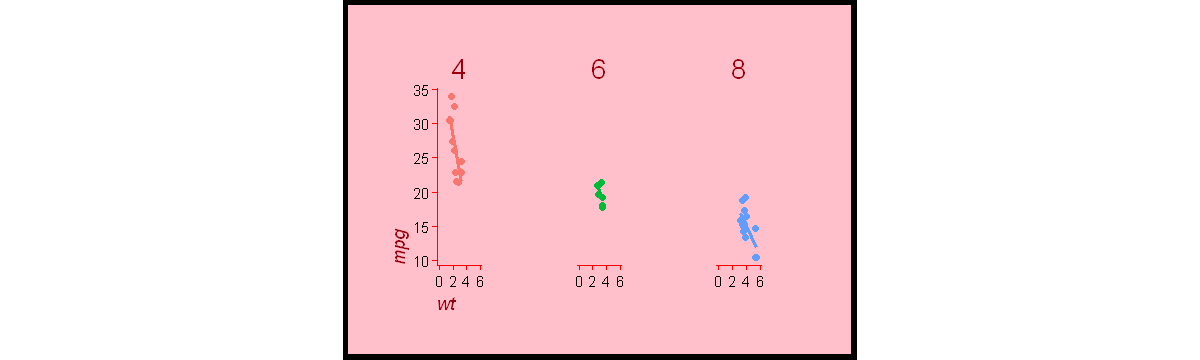

In [37]:
z <-z+theme(panel.grid = element_blank(),
        axis.line = element_line(color = "red"),
        axis.ticks = element_line(color = "red"))

myRed<-"#99000D"

# Extend z with theme() function and 3 args
z<-z +
  theme(strip.text = element_text(size = 16, color = myRed),
        axis.title = element_text(color = myRed, hjust = 0, face = "italic"),
        axis.text = element_text(color = "black")) + theme(legend.position = "none")
z 

# Increase spacing between facets
library(grid)
z + theme(panel.spacing.x = unit(2, "cm"))

# Adjust the plot margin
z + theme(panel.spacing.x = unit(2, "cm"), plot.margin = unit(c(1,2,1,1), "cm"))

### 3.2) Recycling Themes

Sometimes you´ll want to have consistency in your style, in the last section we saw how we can control all the visible non-data ink on our plot with the `theme` layer it was a detailed process that we wouldn´t want to repeat for every plot we make, so let´s look at way our lives a bit easier:

We will some example to do it, we have the following functions:

after that we can adjust specific theme argument to get the desired plot style 


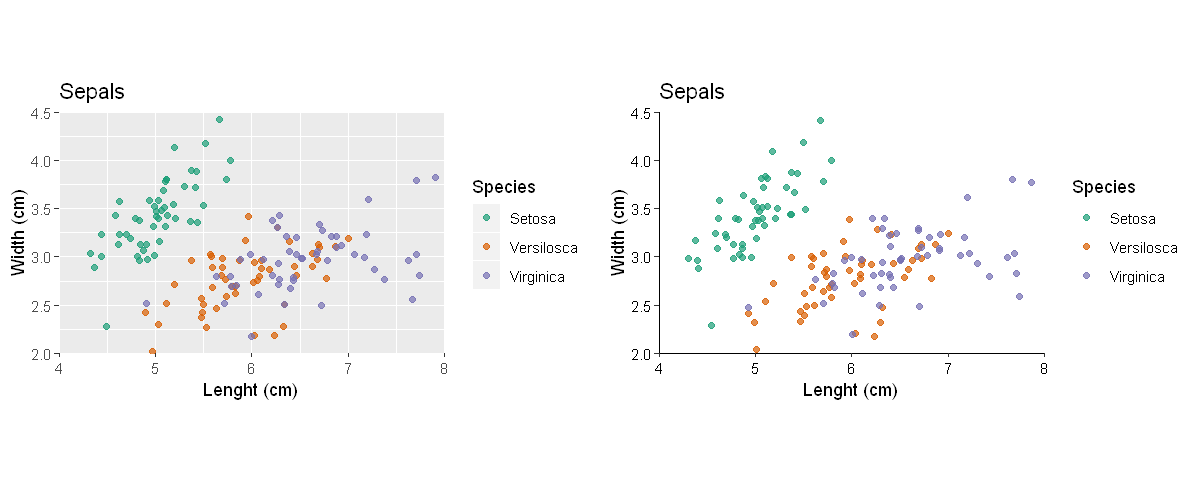

In [4]:
library(ggplot2)
z<-ggplot(iris, aes(x= Sepal.Length, y = Sepal.Width, color = Species)) + geom_jitter(alpha = 0.7) +
  scale_color_brewer("Species",
                     palette = "Dark2",
                     labels = c("Setosa","Versilosca","Virginica")) +
  scale_y_continuous("Width (cm)", limits = c(2, 4.5), expand = c(0, 0)) +
  scale_x_continuous("Lenght (cm)", limits = c(4, 8), expand = c(0, 0)) +
  ggtitle("Sepals") +
  coord_fixed(1)


theme_iris <- theme(panel.background = element_blank(),
          legend.background = element_blank(),
          legend.key = element_blank(),
          panel.grid = element_blank(),
          axis.text = element_text (colour = "black"),
          axis.line = element_line (colour = "black")
)


options(repr.plot.width=10, repr.plot.height=4)
grid.arrange(z, z + theme_iris,nrow = 1)

the `first` method is automating this process is to save our layer as an object, other way of working with themes is accessing the built-in theme templates 

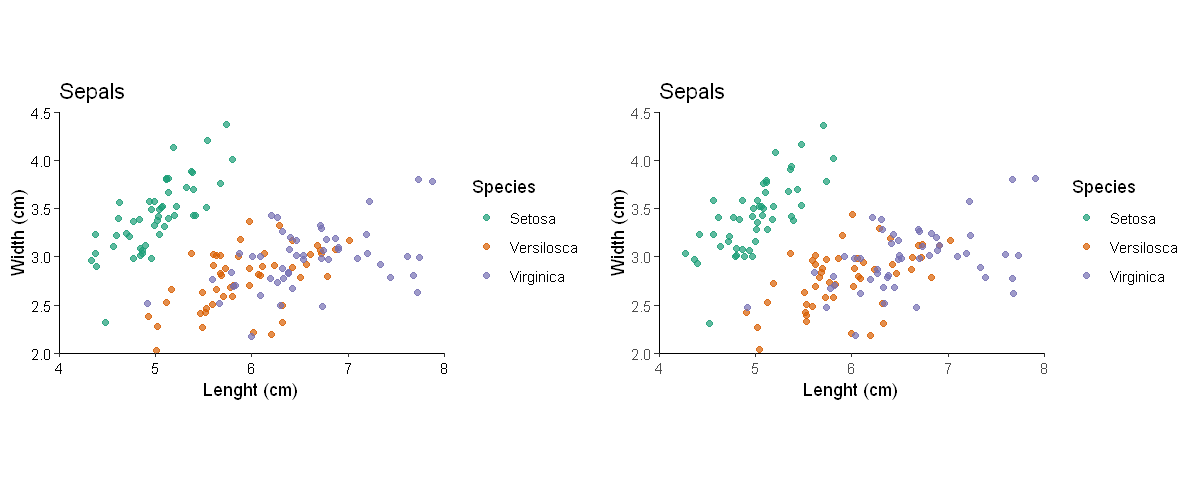

In [6]:

options(repr.plot.width=10, repr.plot.height=4)
grid.arrange(z + theme_iris, z + theme_classic(),nrow = 1)

another way in wich we can use themes is with the ggthemes package, there are a variety of themes to use here, but the most useful is probably the theme: `theme_tufte()` , wich removes all non data ink and also sets the font to a serif typeface 

    library(ggthemes)
    z + theme_tufte()

#### 3.2.1) Updating Themes

Building your themes every time from scratch can become a pain and unnecessarily bloat your scripts. In the following exercises, we'll practice different ways of managing, updating and saving themes.

A plot object `z2` is already created for you on the right. It shows `mpg` against `wt` for the `mtcars` dataset, faceted according to `cyl`. Also the colors `myPink` and `myRed` are available. In the previous exercises you've already customized the rectangles, lines and text on the plot. This theme layer is now separately stored as `theme_pink`, as shown in the sample code.

`theme_update()` updates the default theme used by ggplot2. The arguments for `theme_update()` are the same as for `theme()`. When you call `theme_update()` and assign it to an object (e.g. called `old`), that object stores the current default theme, and the arguments update the default theme. If you want to restore the previous default theme, you can get it back by using `theme_update()` again. Let's see how:

**Exercise**

- "Apply" theme_pink to z2 to carry out all customizations.
- Instead of applying theme_pink, use theme_update(). This function returns an object that contains the previous theme settings, so that you can restore it later. Assign the output of theme_update() to an object called old.
- Plot z2 again, after the theme_update() call. The resulting plot has the same appearance as the previous one - but now you don't need to call theme() explictly.
- Restore the old theme using theme_set(old) and plot z2 again. It's back to the original default theme.

*answer*

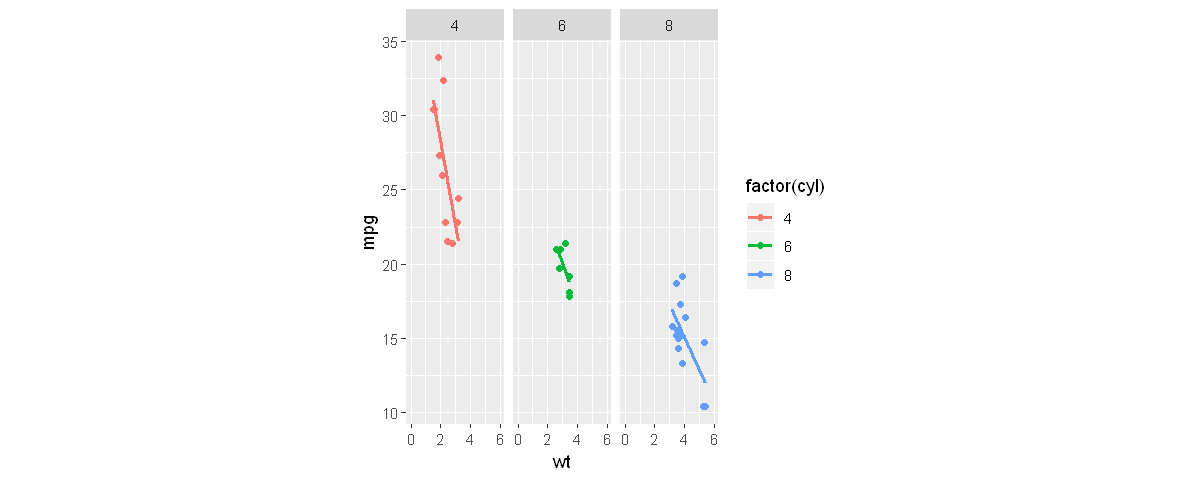

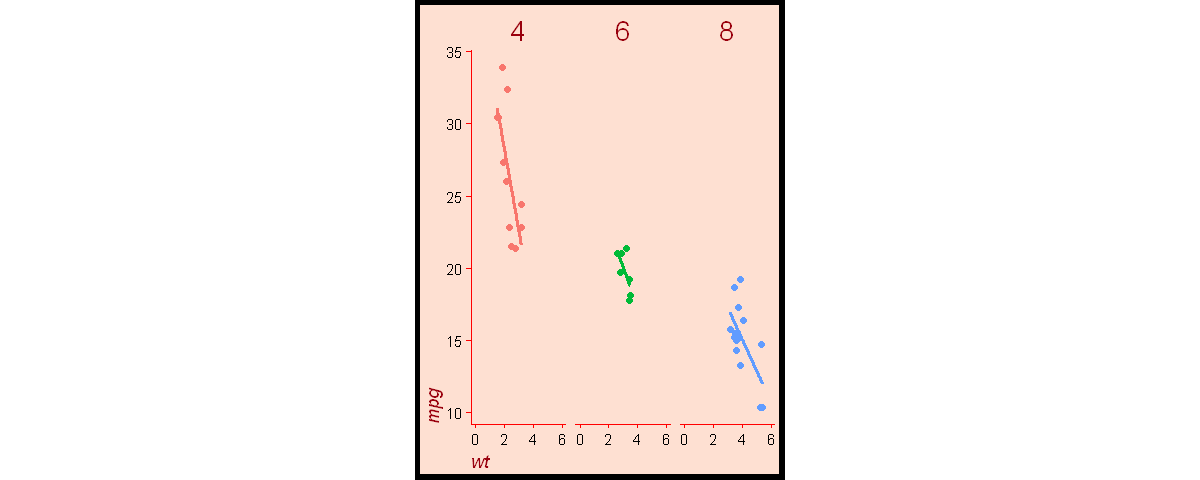

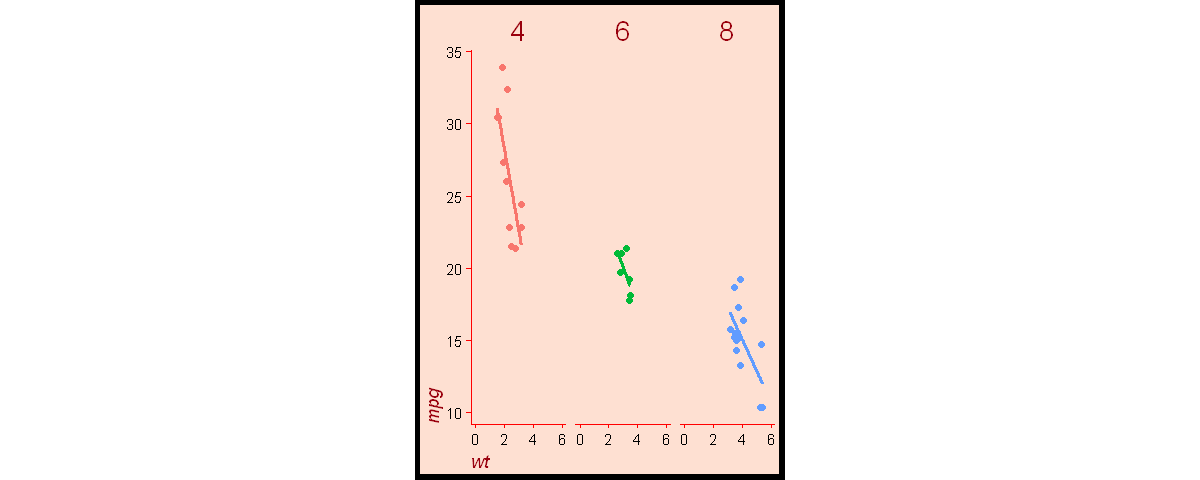

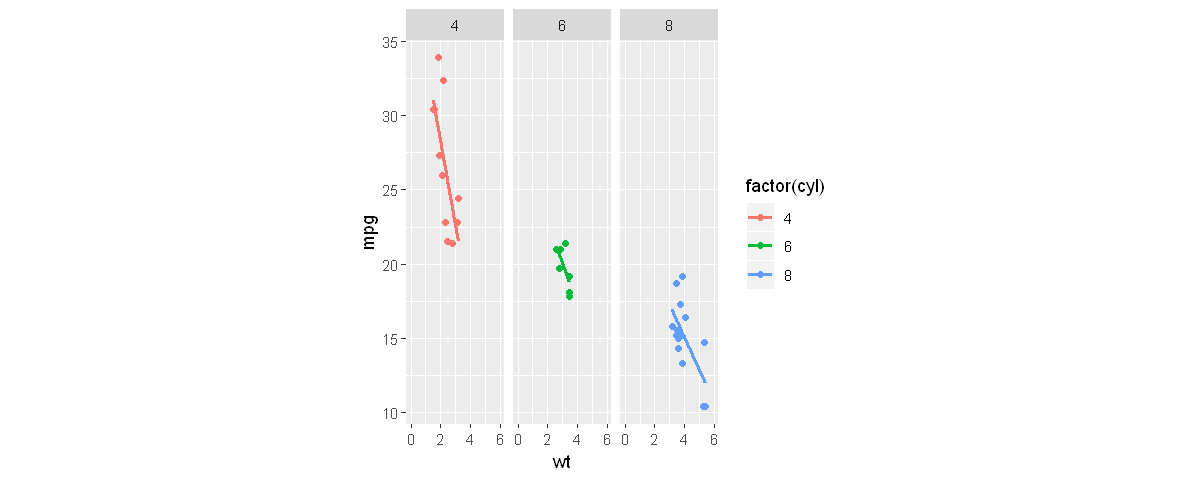

In [7]:
library(ggplot2)
#library(repr)
#Change plot size to 4 x 3
#options(repr.plot.width=3, repr.plot.height=3)

z2<-ggplot(mtcars, aes(x= wt, y = mpg, color = factor(cyl))) + 
  geom_point() + facet_grid(.~factor(cyl)) + geom_smooth(method = lm, se = FALSE) + coord_equal() + 
  scale_x_continuous(limits = c(0,6))
z2

myPink<-"#FEE0D2"
myRed<-"#99000D"

# Theme layer saved as an object, theme_pink
theme_pink <- theme(panel.background = element_blank(),
                    legend.key = element_blank(),
                    legend.background = element_blank(),
                    strip.background = element_blank(),
                    plot.background = element_rect(fill = myPink, color = "black", size = 3),
                    panel.grid = element_blank(),
                    axis.line = element_line(color = "red"),
                    axis.ticks = element_line(color = "red"),
                    strip.text = element_text(size = 16, color = myRed),
                    axis.title.y = element_text(color = myRed, hjust = 0, face = "italic"),
                    axis.title.x = element_text(color = myRed, hjust = 0, face = "italic"),
                    axis.text = element_text(color = "black"),
                    legend.position = "none")

# 1 - Apply theme_pink to z2
z2 + theme_pink

# 2 - Update the default theme, and at the same time
# assign the old theme to the object old.
old <- theme_update(panel.background = element_blank(),
             legend.key = element_blank(),
             legend.background = element_blank(),
             strip.background = element_blank(),
             plot.background = element_rect(fill = myPink, color = "black", size = 3),
             panel.grid = element_blank(),
             axis.line = element_line(color = "red"),
             axis.ticks = element_line(color = "red"),
             strip.text = element_text(size = 16, color = myRed),
             axis.title.y = element_text(color = myRed, hjust = 0, face = "italic"),
             axis.title.x = element_text(color = myRed, hjust = 0, face = "italic"),
             axis.text = element_text(color = "black"),
             legend.position = "none")

# 3 - Display the plot z2 - new default theme used
z2

# 4 - Restore the old default theme
theme_set(old)

# Display the plot z2 - old theme restored
z2




Exploring ggthemes

There are many themes available by default in ggplot2: `theme_bw()`, `theme_classic()`, `theme_gray()`, etc. In the previous exercise, you saw that you can apply these themes to all following plots, with `theme_set()`:

`theme_set(theme_bw())`

But you can also apply them on an individual plot, with:

`... + theme_bw()`

You can also extend these themes with your own modifications. In this exercise, you'll experiment with this and use some preset templates available from the ggthemes package. The workspace already contains the same basic plot from before under the name z2

## 4) Best Practices 
Once you have the technical skill to make great visualizations, it’s important that you make them as meaningful as possible. In this chapter we’ll go over three plot types that are mostly discouraged in the data viz community - heat maps, pie charts and dynamite plots. We’ll understand what the problems are with these plots and what the alternatives are.

### 1.1) Best Practices: Bar Plots:
